In [1]:
from helpers import *
from sentiment_functions import *
from emotion_functions import *

2022-07-12 11:12:17.589014: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 11:12:17.589065: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-12 11:12:29.652179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 11:12:29.652223: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 11:12:29.652259: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (david-Aspire-A315-42): /proc/driver/nvidia/version does not exist
2022-07-12 11:12:29.652978: I tensorflow/core/platform/c

# SENTIMENT ANALYSIS

In [2]:
df= pd.read_csv('/home/david/Escritorio/sa_bertsent_it_english_sentences_title.csv')

In [3]:
df=df.drop(df[df['Date']<'2020-01-01'].index,inplace=False)

In [4]:
df=df.drop(df[df['Date']>'2021-10-31'].index,inplace=False)

In [5]:
df.replace({'sentiment_title': 1}, {'sentiment_title': 'Neutral'}, regex=True,inplace=True)
df.replace({'sentiment_title': 0}, {'sentiment_title': 'Negative'}, regex=True,inplace=True)
df.replace({'sentiment_title': 2}, {'sentiment_title': 'Positive'}, regex=True,inplace=True)

In [6]:
df['Country']="Italy"

In [7]:
import ast
for index,row in df.iterrows(): 
    df['list_sentences'][index]= ast.literal_eval(df['list_sentences'][index])
    df['list_labels'][index]= ast.literal_eval(df['list_labels'][index])

In [8]:
list_porcentage_positive_sentences=[]
list_porcentage_neutral_sentences=[]
list_porcentage_negative_sentences=[]
for index,row in df.iterrows(): 
    list_porcentage_negative_sentences.append(df['list_labels'][index].count(0)/len(df['list_labels'][index]))
    list_porcentage_neutral_sentences.append(df['list_labels'][index].count(1)/len(df['list_labels'][index]))
    list_porcentage_positive_sentences.append(df['list_labels'][index].count(2)/len(df['list_labels'][index]))
df['porcentage_positive']=list_porcentage_positive_sentences
df['porcentage_negative']=list_porcentage_negative_sentences
df['porcentage_neutral']=list_porcentage_neutral_sentences

In [9]:
df['n_words'] = df.Text_en.apply(lambda x: len(str(x).split(' ')))

In [10]:
df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAMES_ENGLISH_WITH_SENTIMENT/sa_bertsent_it_english_sentences_title.csv', index = False)

In [11]:
df.loc[9]

Title_en               Covid vaccine over 80, the first day for the e...
Text_en                One hundred and one years old, and no fear of ...
Authors                                                     Sara Bettoni
Date                                                          2021-02-18
Link                   https://milano.corriere.it/notizie/cronaca/21_...
Newspaper                                            Corriere della Sera
sentiment_title                                                 Positive
list_sentences         [One hundred and one years old, and no fear of...
list_labels            [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, ...
Country                                                            Italy
porcentage_positive                                                 0.08
porcentage_negative                                                 0.08
porcentage_neutral                                                  0.84
n_words                                            

In [12]:
len(df[df['sentiment_title']=="Negative"])

1419

In [13]:
len(df[df['porcentage_negative']>df['porcentage_neutral']])

123

In [14]:
df[df['sentiment_title']=="Negative"]

Title_en  \
1     Covid, the bulletin from Sicily: 618 new posit...   
7     Atalanta fans: 'Why not reopen stadiums after ...   
8     Cnn, three employees fired: 'They entered the ...   
17    Vaccinations, missteps on GDP and too many dou...   
18    Vaccine for the over 70s, false start in Piedm...   
...                                                 ...   
7120  Guterres at 74th WHO Assembly: 'It's war on th...   
7125  Green pass at work, insufficient buffers: risk...   
7128  The lost meaning of the Tokyo Games, between r...   
7140    A vaccine against parametric overkill is needed   
7144  School, 220,000 substitute teachers at risk. D...   

                                                Text_en  \
1     There have been 618 new cases of Covid 19 reco...   
7     The Associazione Tifosi Atalantini (Ata) has s...   
8     They were not vaccinated, went to the office a...   
17    Dear Schiavi, I appreciate the declared willin...   
18    Pharmacists not informed of the operation of t...   
...                                                 ...   
7120  "The Covid-19 pandemic caused a tsunami of suf...   
7125  There could be around 2.5 million workers in I...   
7128  Emperor Naruhito will be there, but without Em...   
7140  All right. I admit it. I was wrong. I made a m...   
7144  It makes little difference whether the new Min...   

                               Authors        Date  \
1                                error  2021-09-13   
7             Redazione Bergamo online  2021-06-23   
8                   Redazione Economia  2021-08-06   
17                 Giangiacomo Schiavi  2021-01-21   
18                  Lorenza Castagneri  2021-03-29   
...                                ...         ...   
7120                             error  2021-05-24   
7125               di Andrea Gagliardi  2021-10-12   
7128       di Gianluca Di Donfrancesco  2021-07-22   
7140                   di Dario Braga*  2021-06-02   
7144  di Eugenio Bruno e Claudio Tucci  2021-02-08   

                                                   Link            Newspaper  \
1     https://corrieredelmezzogiorno.corriere.it/pal...  Corriere della Sera   
7     https://bergamo.corriere.it/notizie/cronaca/21...  Corriere della Sera   
8     https://www.corriere.it/economia/lavoro/21_ago...  Corriere della Sera   
17    https://milano.corriere.it/notizie/caso_del_gi...  Corriere della Sera   
18    https://torino.corriere.it/cronaca/21_marzo_29...  Corriere della Sera   
...                                                 ...                  ...   
7120  http://www.sanita24.ilsole24ore.com/art/europa...       Il Sole 24 Ore   
7125  https://www.ilsole24ore.com/art/green-pass-lav...       Il Sole 24 Ore   
7128  https://24plus.ilsole24ore.com/art/il-senso-pe...       Il Sole 24 Ore   
7140  https://www.ilsole24ore.com/art/ci-vuole-vacci...       Il Sole 24 Ore   
7144  https://www.ilsole24ore.com/art/supplenti-e-cl...       Il Sole 24 Ore   

     sentiment_title                                     list_sentences  \
1           Negative  [There have been 618 new cases of Covid 19 rec...   
7           Negative  [The Associazione Tifosi Atalantini (Ata) has ...   
8           Negative  [They were not vaccinated, went to the office ...   
17          Negative  [Dear Schiavi, I appreciate the declared willi...   
18          Negative  [Pharmacists not informed of the operation of ...   
...              ...                                                ...   
7120        Negative  ["The Covid-19 pandemic caused a tsunami of su...   
7125        Negative  [There could be around 2.5 million workers in ...   
7128        Negative  [Emperor Naruhito will be there, but without E...   
7140        Negative  [All right., I admit it., I was wrong., I made...   
7144        Negative  [It makes little difference whether the new Mi...   

                                            list_labels Country  \
1      [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1

# General descriptive analysis of articles in ITALY

In [15]:
list_sentences=[]
for index,row in df.iterrows(): 
    for sentence in df['list_sentences'][index]:
        list_sentences.append(sentence)
len(list_sentences)

210388

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Naples, Giorgia Meloni: 'Maresca added value'.
Vaccines Lazio, Peter Schneider vaccinated in Priverno: "An amazing success, congratulations".
The golden vaccine: developing a vaccine at the time of a pandemic
SAMPLES OF NEGATIVE HEADLINES
Company vaccines, Confindustria can make up to 12 million of them
Open schools and the risk of contagion: what the Italian case study really says
Visco: vaccinations too late. This is an obstacle to economic recovery


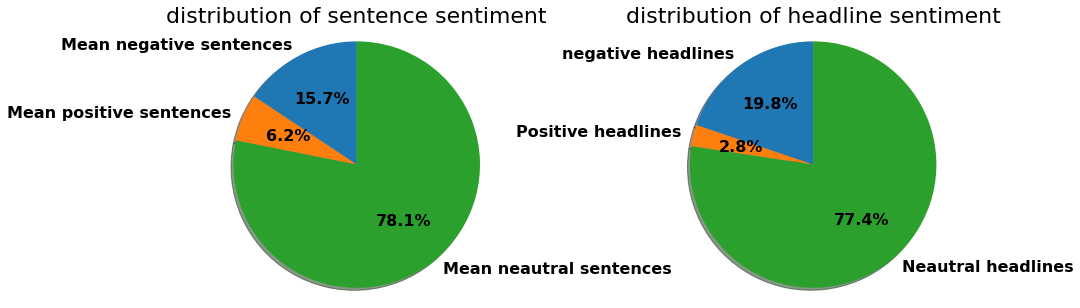

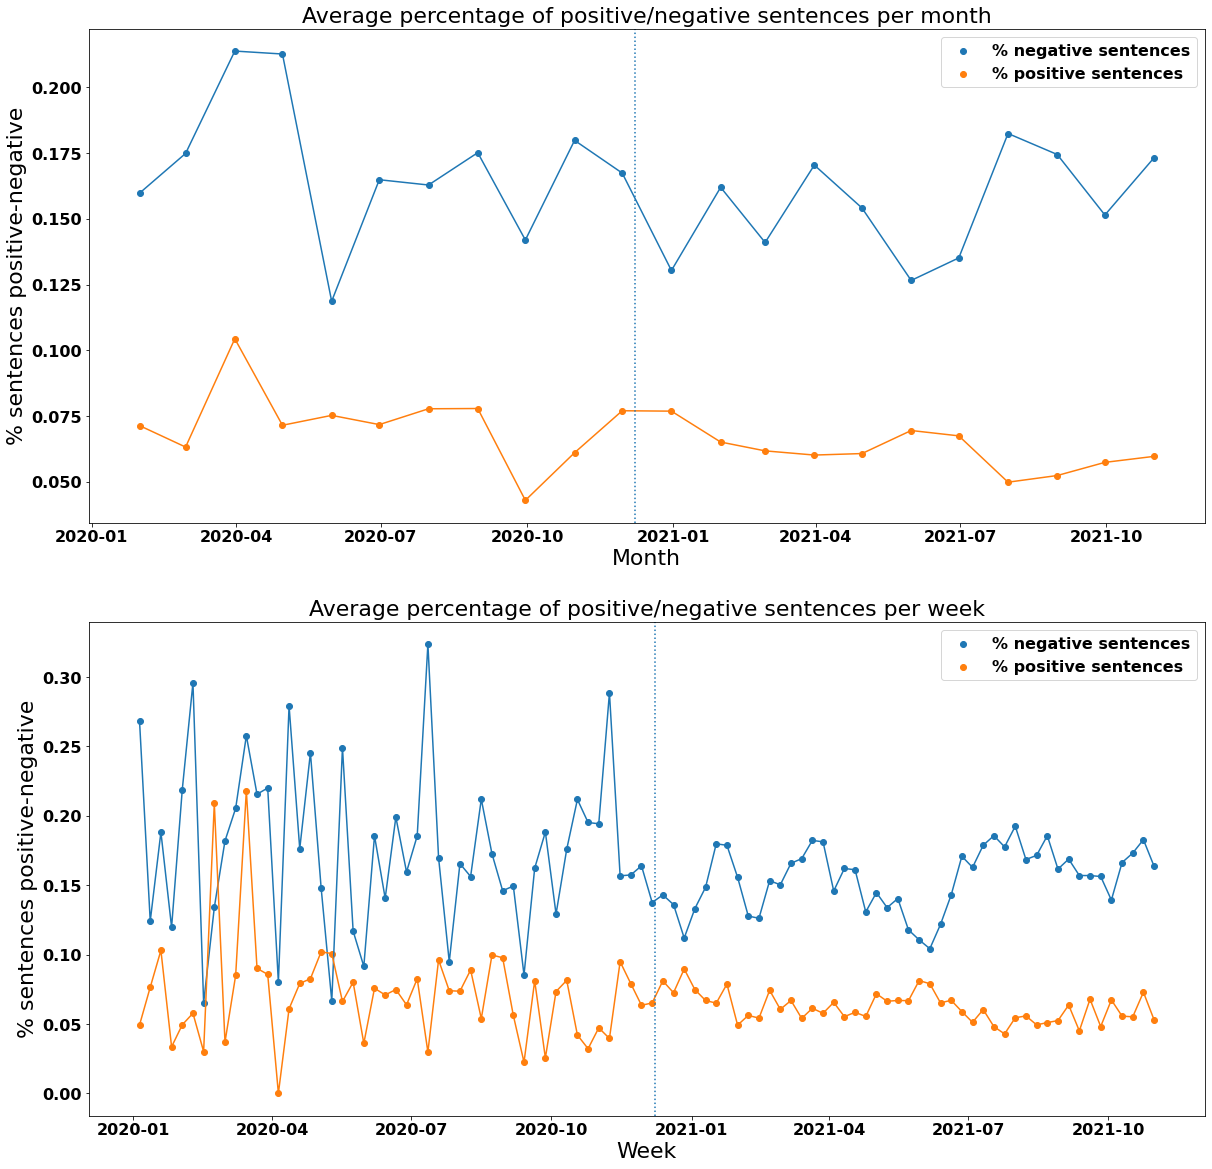

In [16]:
sentiment_analysis(df,'2020-12-08')

In [19]:
emotion_analysis(df)

In [20]:
# df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_it_english_title_emotion.csv', index = False)

In [2]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_it_english_title_emotion.csv')

In [3]:
def plot_emotions(subset):
        
    my_labels = subset['emotion_transformers_1'].unique()
    ax = subset['emotion_transformers_1'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct)
    ax.axes.get_yaxis().set_visible(False)
#     plt.legend(labels=my_labels)

In [4]:
len(df[df['emotion_transformers_1']=="neutral"])

5819

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


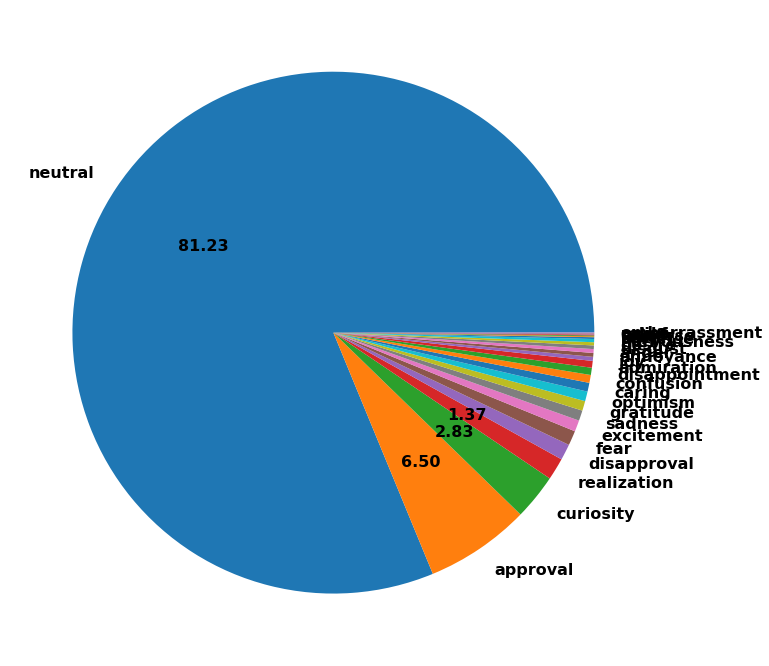

In [5]:
plot_emotions(df)

# SUBTOPICS 

I think it is useful for the analysis of subtopics not to take into account the articles that review the most important news of the week, because they deal with many different topics and I consider that they have an impact on the results.

In [7]:
df_sub=df.drop(df[df['n_words']>3000].index,inplace=False)

In [10]:
ue_words="European Union|EU|European Commission"
european_union=df_sub[(df_sub['Title_en'].str.contains(ue_words))|(df_sub['Text_en'].str.contains(ue_words))]

In [11]:
len(european_union)/len(df_sub)

0.14027084818246616

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Covid vaccine, green light for Invitalia-Reithera development contract. Italian vaccine investment of 81 million. Zingaretti: "Essential help in the fight against the virus".
Budgetary discipline is the only vaccine to ward off the debt pandemic
European bricks and mortar celebrate and aim for 280 billion investments
SAMPLES OF NEGATIVE HEADLINES
Coronavirus, Gimbe: with the vaccine, the number of infections among healthcare workers has fallen (-64%) 'Stable cases, but variants are a cause for concern'
Covid in Germany, infections remain high: national emergency measures triggered (and Länder protest)
Vaccine war breaks out between London and Brussels


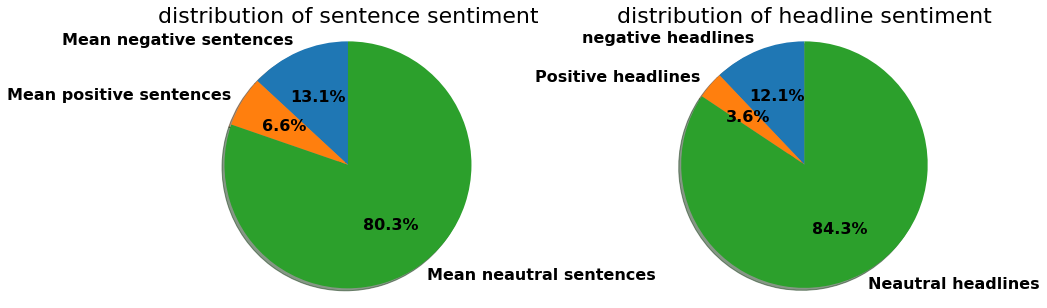

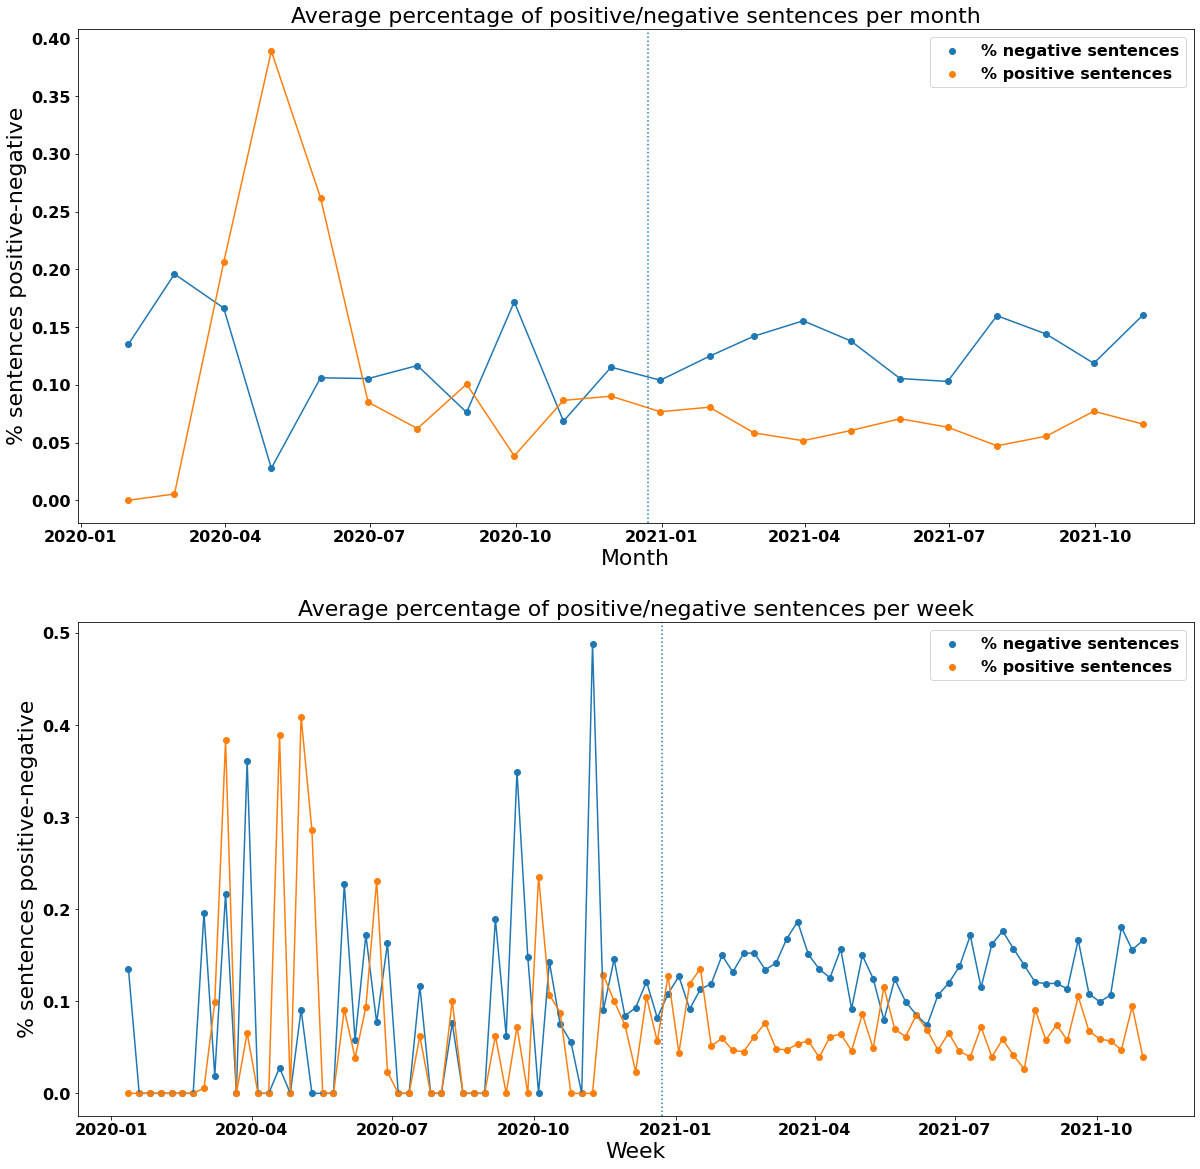

In [12]:
sentiment_analysis(european_union,'2020-12-23')

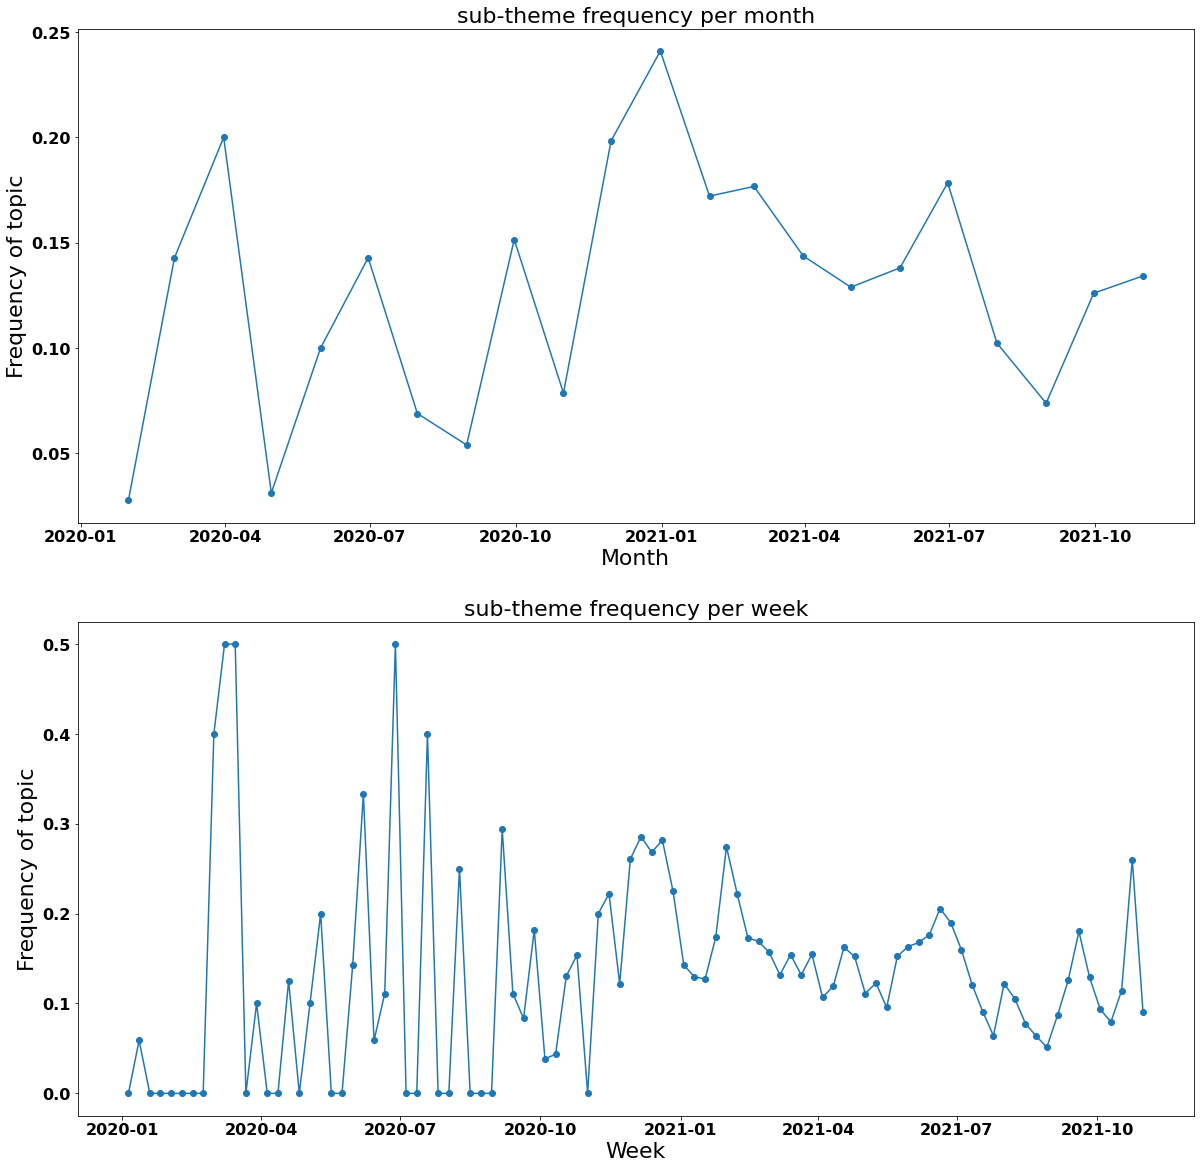

In [13]:
frequency_topics(df_sub, european_union)

In [17]:
# #get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(european_union.list_labels[39]) if x == 0]
# for i in indices: 
#     print(european_union.list_sentences[39][i])

SAMPLES OF POSITIVE SENTENCES
Nellimmediate Johnson can rightly claim some successes such as an unemployment rate that, despite the crisis, has only risen to 4.7% against an EU average of 7.3%, thanks mainly to the generous Treasury support programme.
Our work will always be guided by the scientific evidence and our commitment to safeguarding the health of EU citizens".
SAMPLES OF NEGATIVE SENTENCES
Of course, the reasons for the difficulties in managing the pandemic within the EU are many and cannot be blamed entirely on the EU institutions.
Any easing during the summer months of the severity of the non-pharmacological measures in place in the EU at the beginning of June, without a simultaneous increase in the levels of full vaccination in the population, could lead to a sudden and significant increase in daily Covid-19 cases in all age groups, and especially in those over 50 years old, with an associated increase in hospitalisations and deaths".


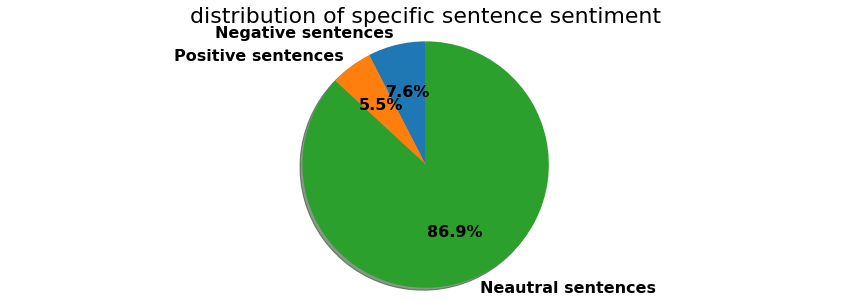

In [18]:
sentences_with_word(european_union,ue_words)

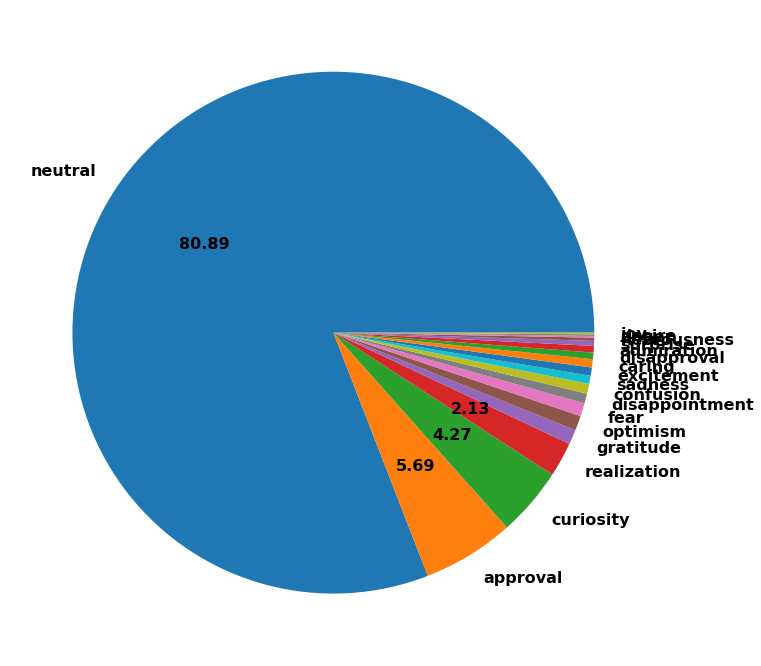

In [16]:
plot_emotions(european_union)

In [8]:
no_vax_words="anti-vaxxers|anti-vaccine|anti-vaxx|anti-corona|no-vax|no vax|anti-vaccin"
no_vax=df_sub[(df_sub['Title_en'].str.contains(no_vax_words))|(df_sub['Text_en'].str.contains(no_vax_words))]
len(no_vax)/len(df_sub)

0.07640769779044904

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Puglia now invents smart working for no-vaccine nurses
US vaccination lottery: 22-year-old woman wins 1 million (and young people's applications rise by 94%)
Elizabeth and the queens of London championed medicine in the 18th century
SAMPLES OF NEGATIVE HEADLINES
"Those who don't vaccinate should be put on leave". Conad's managing director unleashes the ire of the no vax people
Vaccinated people infected, first studies say: hospitalisations and deaths fall
Covid, Veneto from low to moderate risk: 'Increase in admissions of elderly people'.


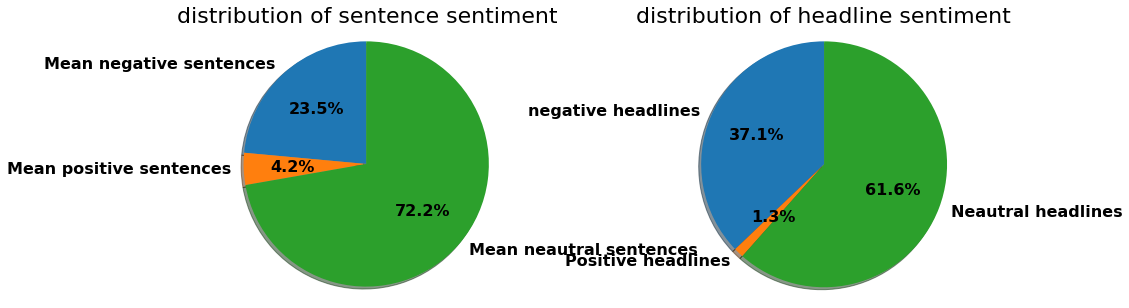

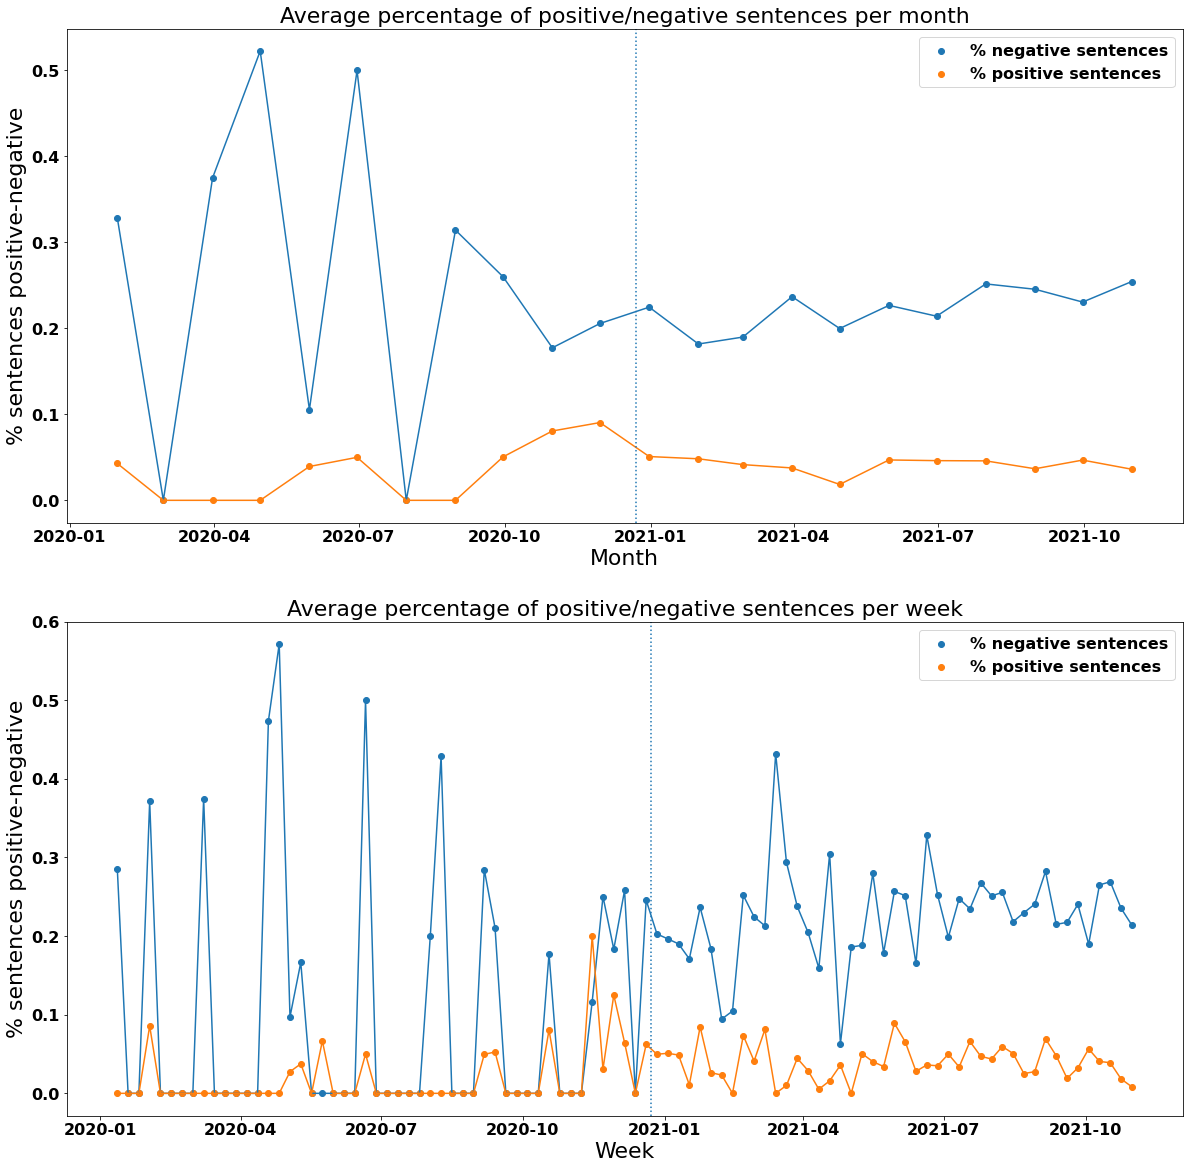

In [9]:
sentiment_analysis(no_vax,'2020-12-23')

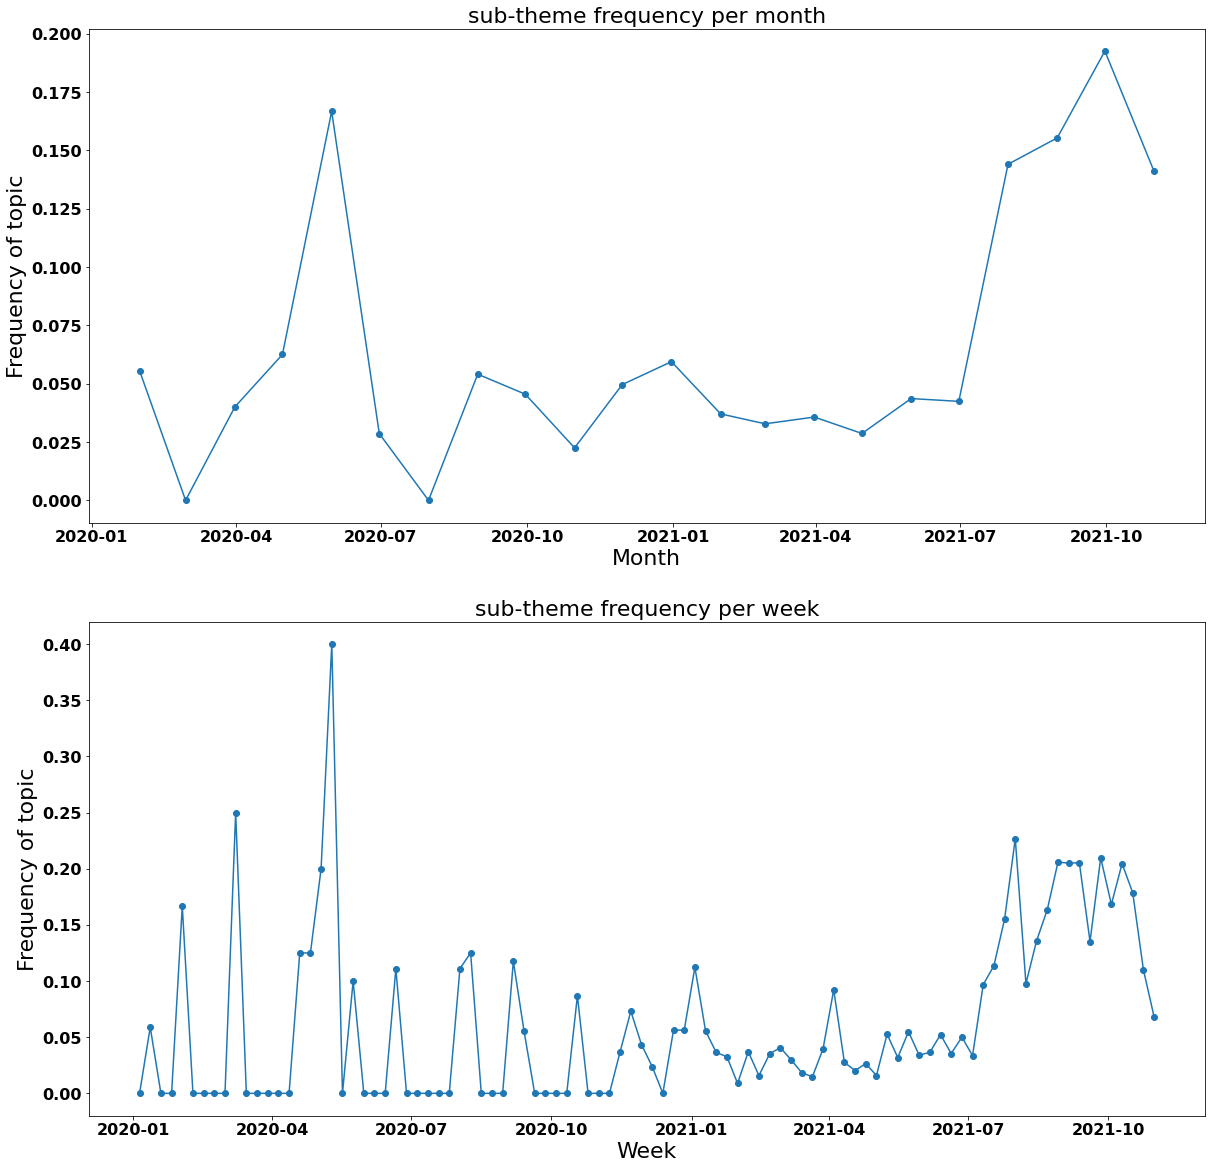

In [10]:
frequency_topics(df_sub, no_vax)

In [22]:
# ### get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(no_vax.list_labels[33]) if x == 0]
# for i in indices: 
#     print(no_vax.list_sentences[33][i])

SAMPLES OF POSITIVE SENTENCES
Grad-Cov2, the first anti-coronavirus vaccine developed in Italy and currently being tested in Veneto (at the Borgo Roma hospital in Verona), seems to be working.
Rossana, 63 years old, leaves with a smile, driven by the "convenience of the single dose" and enthusiastic about the service received: "This pharmacy is the top of professionalism: for people like me, who are not no-vax but need to be accompanied in this choice, you need a different approach.
SAMPLES OF NEGATIVE SENTENCES
Less than ever acceptable, above all, the no vax attitudes.
In addition, it was noted that many people among those who, for example, demonstrated in Wisconsin against the lockdown carried anti-vaccine 'insignia'.


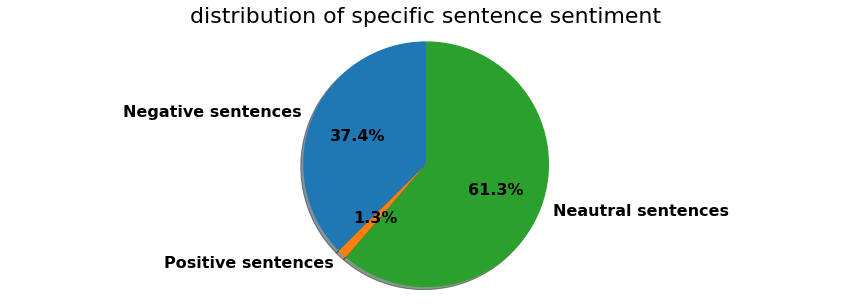

In [23]:
sentences_with_word(no_vax,no_vax_words)

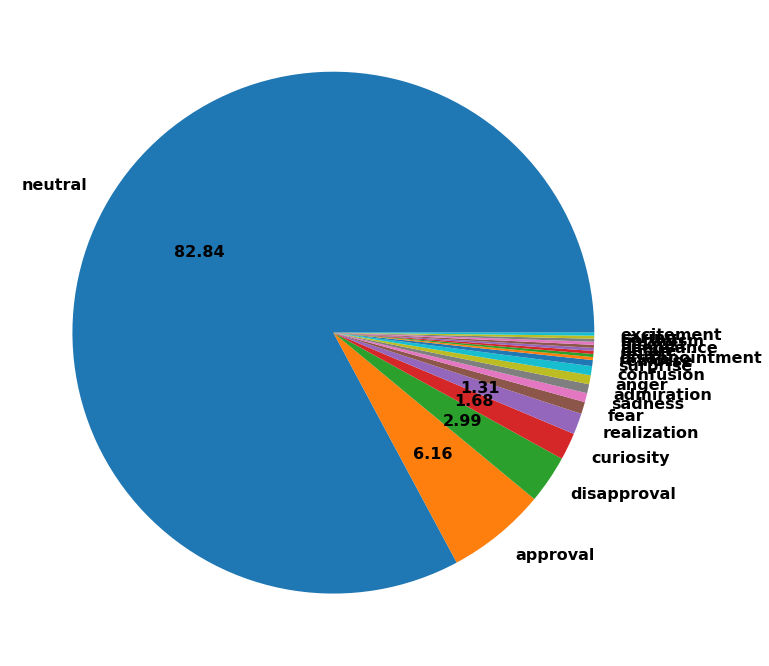

In [11]:
plot_emotions(no_vax)

In [24]:
economy_words="gdp|bank|economy|economist|investment|market"
economy=df_sub[(df_sub['Title_en'].str.contains(economy_words))|(df_sub['Text_en'].str.contains(economy_words))]
len(economy)/len(df_sub)

0.18032786885245902

SAMPLES OF POSITIVE HEADLINES
Covid has made the EU stronger, flexible budgets also in 2021
Stock exchanges without flashes. Piazza Affari the best, Unipol and Diasorin shine.
Tourists promote Campania: 95% recommend it for their holidays
SAMPLES OF NEGATIVE HEADLINES
Merkel, the difficult legacy
Genoa, elderly woman in RSA dies of cerebral haemorrhage after Covid vaccine. Region: no link at the moment
Coronavirus, record infections in Russia. And Prime Minister Mishustin is under quarantine


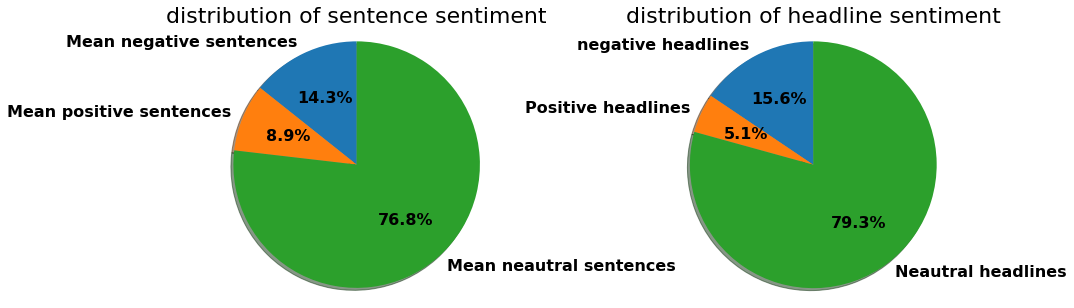

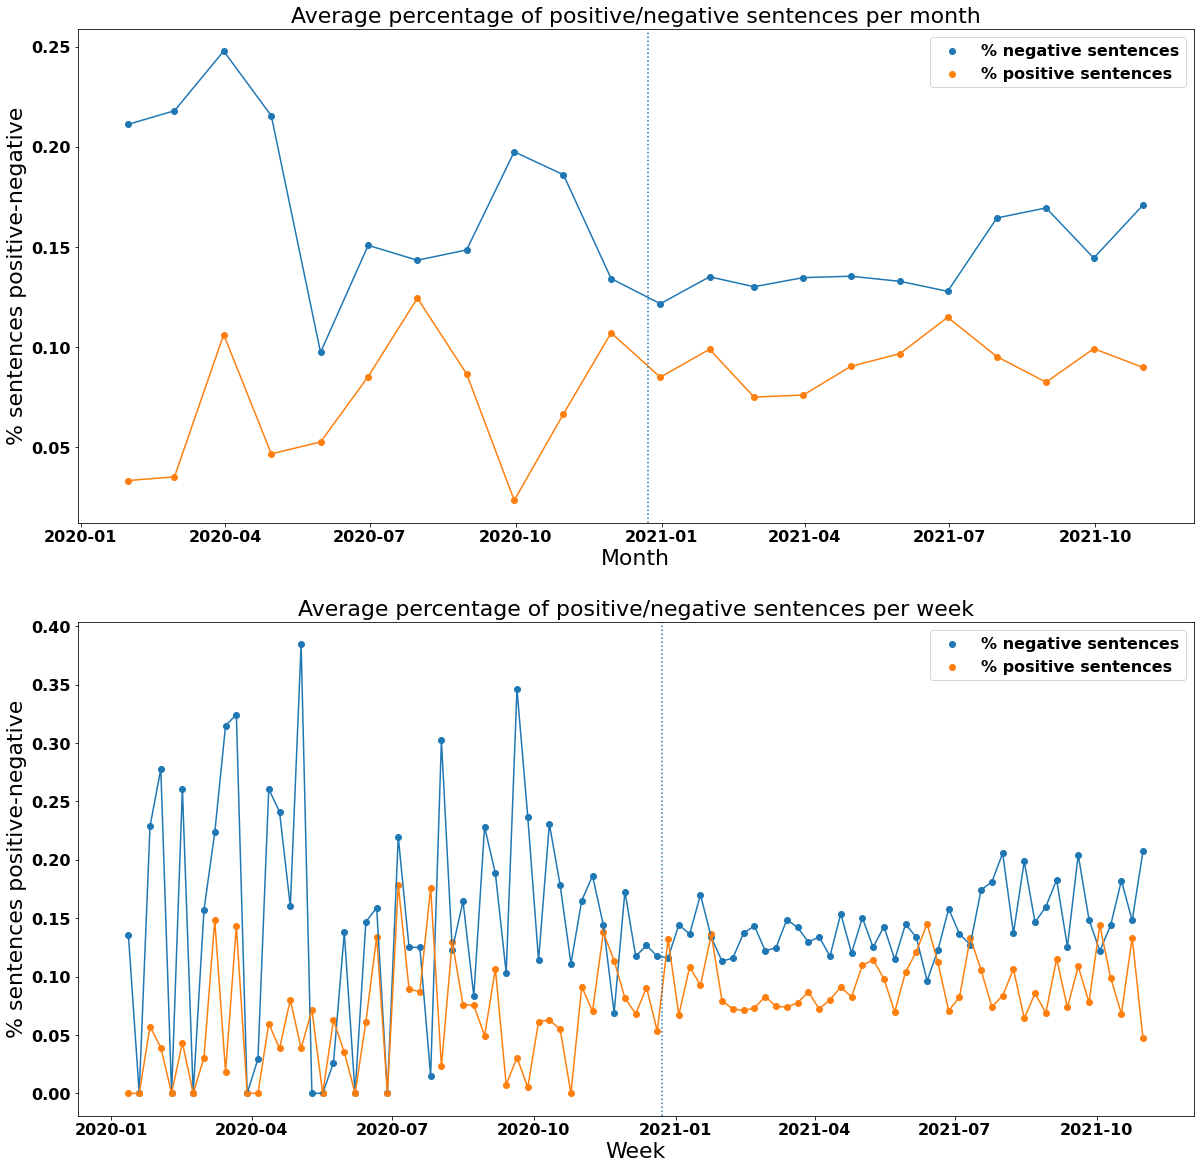

In [25]:
sentiment_analysis(economy,'2020-12-23')

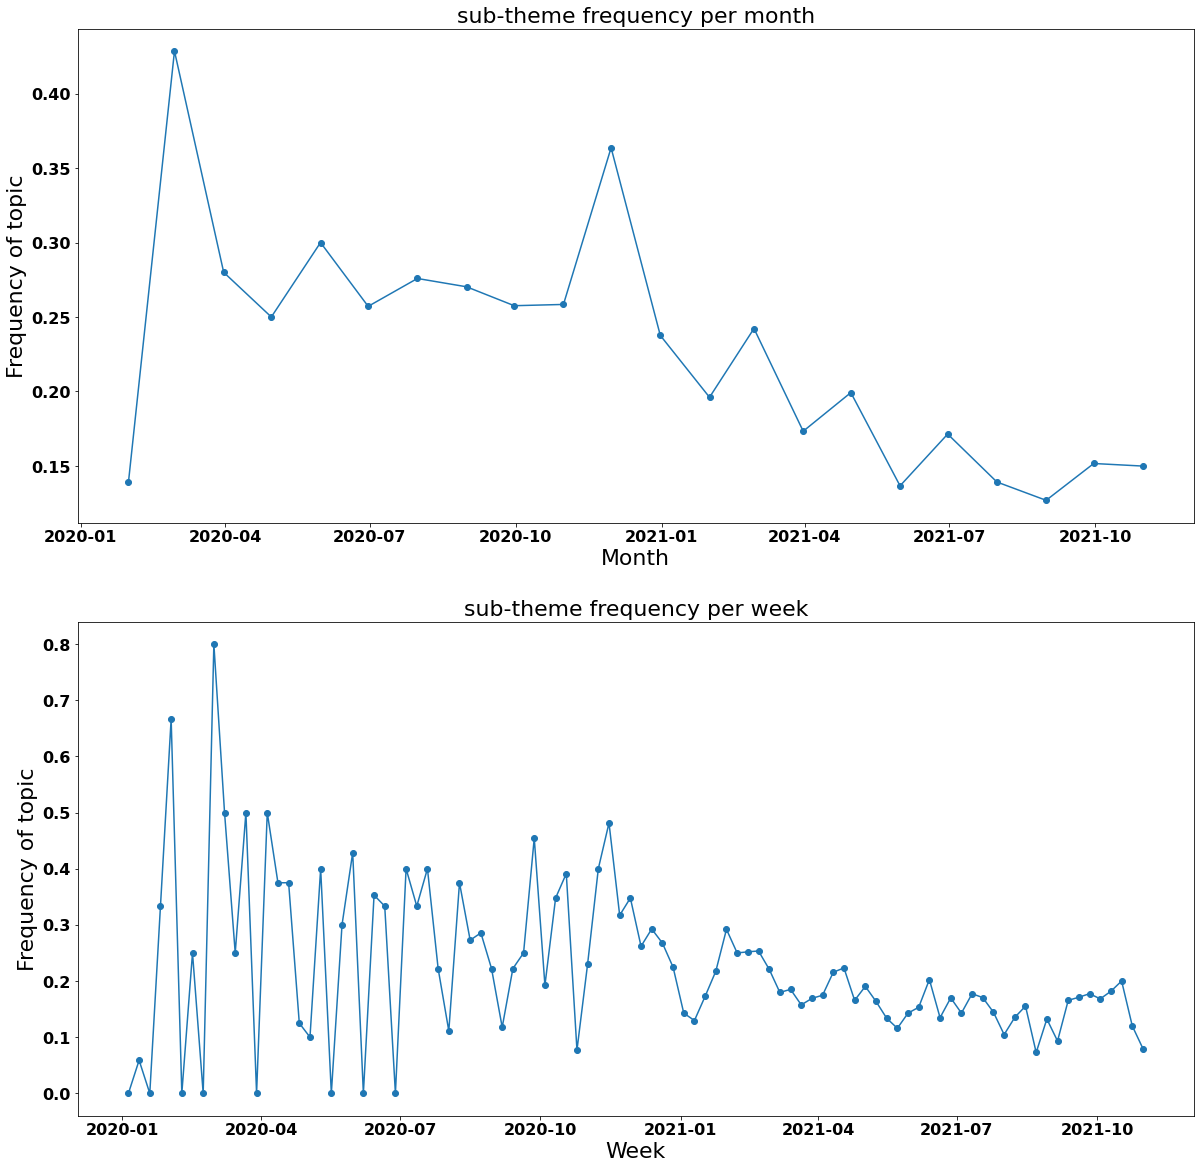

In [26]:
frequency_topics(df_sub, economy)

SAMPLES OF POSITIVE SENTENCES
The president of the Italian-Russian Chamber of Commerce Vincenzo Trani, according to lente on its website, confirmed that "Italian companies are strategic, have unique skills and competences in the European panorama, and are able to face the market with flexibility and speed.
A surcharge would recognise that "some companies have done very well, including in terms of stock market valuation", during the pandemic, said the deputy director of the IMF's Fiscal Affairs Department, Paolo Mauro, during the press conference presenting the Fiscal Monitor, released on Wednesday 7 April.
SAMPLES OF NEGATIVE SENTENCES
As for the hypothesized long-term adverse events, the consultant stated that 'if, before any drug is put on the market, one had to wait for an assessment not only of biological plausibility but also of epidemiological evidence as to the frequency of long-term adverse events, science would have been paralysed and would have had a logarithmically slower pa

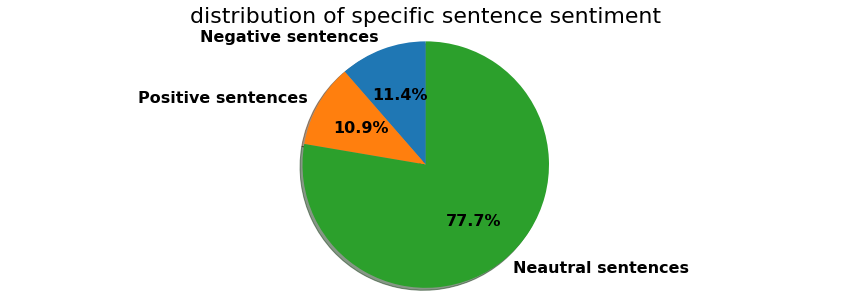

In [27]:
sentences_with_word(economy,economy_words)

In [28]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(economy.list_labels[5]) if x == 0]
for i in indices: 
    print(economy.list_sentences[5][i])

No more deaths at work!
Almost one person in four (24.4 per cent) is a "new poor", i.e.
In the course of more than a year of the pandemic, at least 453,731 new poor people have approached Caritas".


In [29]:
education_words="education|pupil|classroom|student|school"
education=df_sub[(df_sub['Title_en'].str.contains(education_words))|(df_sub['Text_en'].str.contains(education_words))]
len(education)/len(df_sub)

0.2963649322879544

SAMPLES OF POSITIVE HEADLINES
I had the vaccine and it was great
Carrie Lam reassures Europe: HK is solid and will 'lead' the Greater Bay Area
Ema gives green light to Pfizer-BioNTech vaccine for adolescents. Speranza: "Good news also for the re-opening of schools in September".
SAMPLES OF NEGATIVE HEADLINES
Covid, the doctor of patient 1 in Codogno: "We, alone in a stormy sea. Now I have patients of all ages".
Anti-Covid vaccines for the over 60s, a false start: in the Brescia area they start on Monday
Who is Daillet-Wiedemann, the conspiracy guru who financed the abduction of the 8-year-old girl in France?


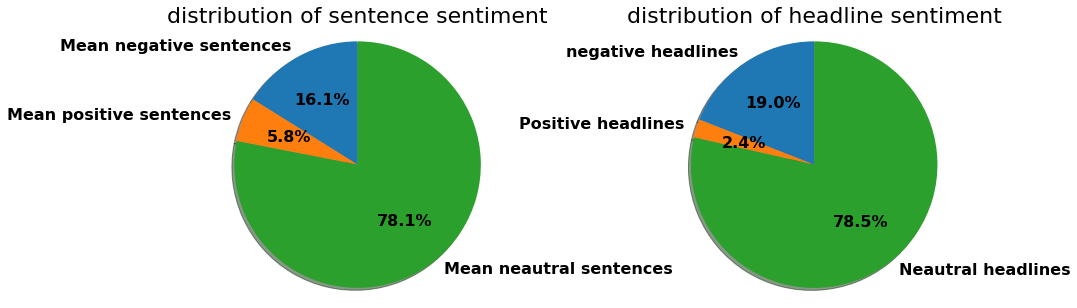

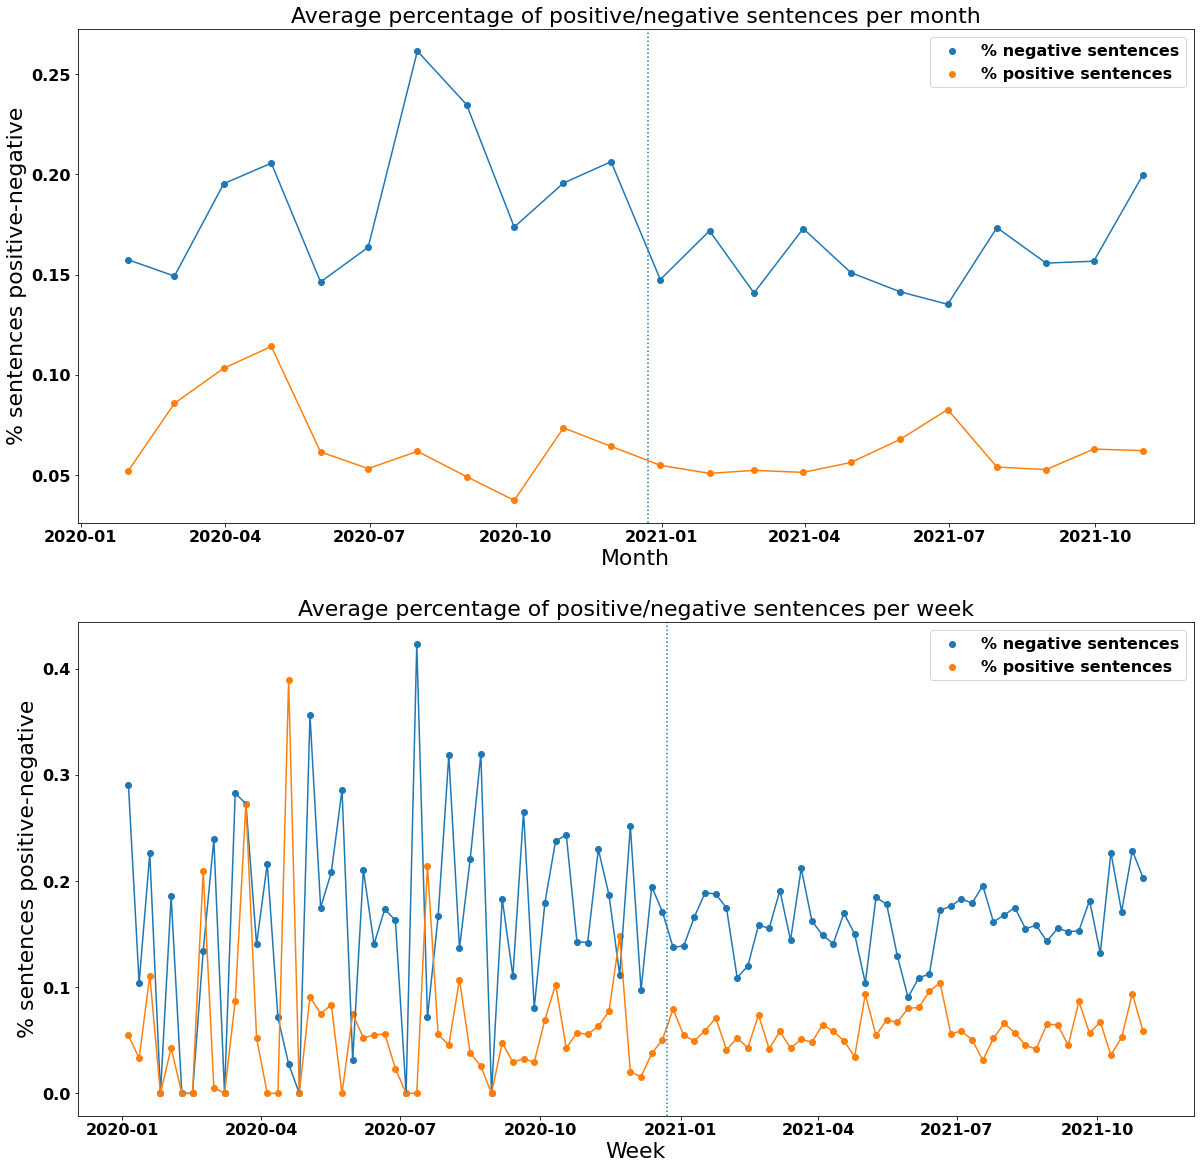

In [30]:
sentiment_analysis(education,'2020-12-23')

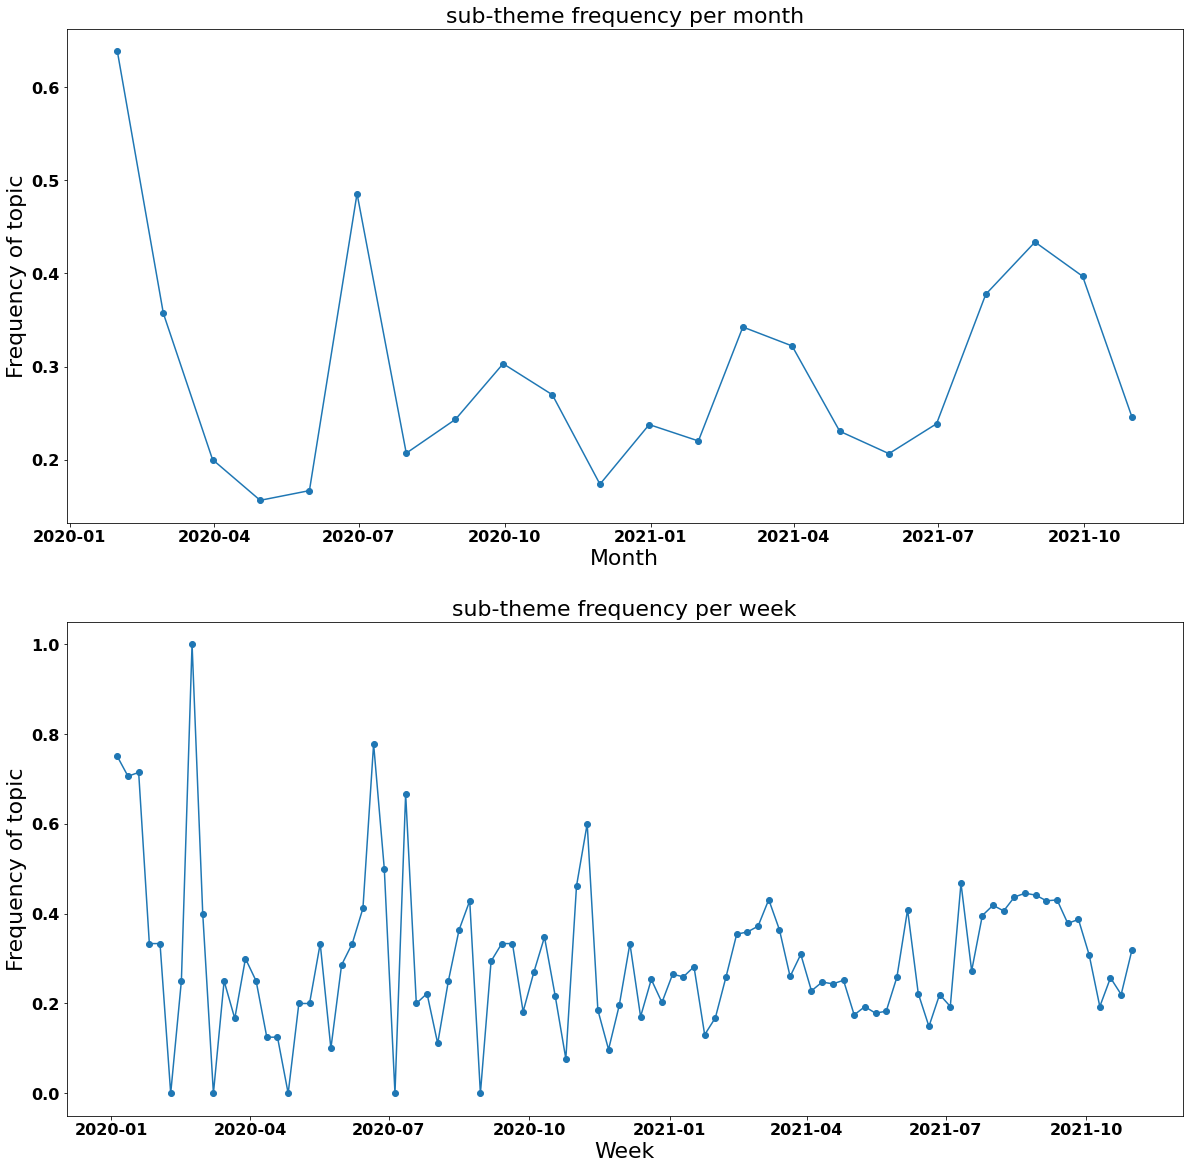

In [31]:
frequency_topics(df_sub, education)

SAMPLES OF POSITIVE SENTENCES
The school is the oxygen of society, its functioning mirrors that of the country, we have a valuable school, thanks to the teachers, the staff, the students, we know that there are aspects that need to be improved, we suffer from old delays, inefficiency, inequalities, we do not lack the capacity to overcome them".
Prime Minister Draghi's announcement to reopen schools up to the sixth grade, even in the red areas, is already a step forward for families.
SAMPLES OF NEGATIVE SENTENCES
The fact that many schools were still closed before has had an impact.
What frightens the promoters of the appeal, however, are not the rules as such but the free interpretations that could be given, as we have already seen unfortunately on the issue of openings and closures of schools, since some regions have systematically disregarded the provisions of the government.


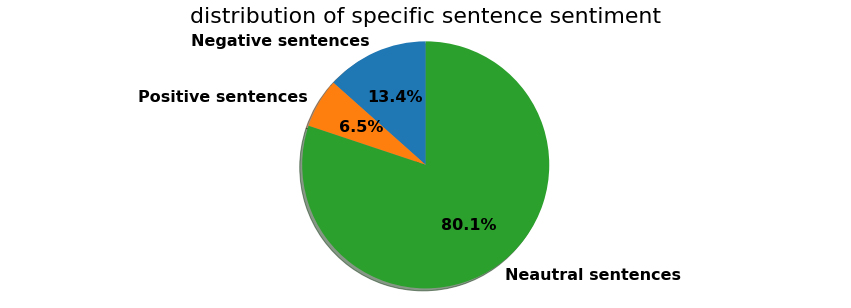

In [32]:
sentences_with_word(education,education_words)

In [33]:
education

Title_en  \
4     Green pass and compulsory vaccination: trade u...   
12    Vaccines Lombardy, the Region changes course: ...   
22    Vaccines, from tomorrow the third dose for the...   
23    Advanced doses of vaccine to relatives and fri...   
24    Vaccinations, slow progress: first dose for th...   
...                                                 ...   
7144  School, 220,000 substitute teachers at risk. D...   
7159  Manoeuvre, stop the sugar tax and VAT on Covid...   
7160  "Italian vaccine needed, packaging district re...   
7161  Variante Delta, Police to police headquarters:...   
7162  Covid/Zingaretti: appeal to Ema and Aifa for g...   

                                                Text_en  \
4     In a letter sent to Draghi himself, the secret...   
12    The Lombardy Region's vaccination strategy is ...   
22    From tomorrow, 29 September, the administratio...   
23    Vaccination campaign on a fast track. So, in o...   
24    The procedure for vaccinating the over-80s has...   
...                                                 ...   
7144  It makes little difference whether the new Min...   
7159  A new postponement of the sugar tax from 1 Jul...   
7160  It is the region with the highest increase in ...   
7161  The increase in Covid-19 infections in Italy '...   
7162  "A few days ago Prime Minister Draghi called o...   

                               Authors        Date  \
4                         Enrico Marro  2021-06-24   
12                     Stefania Chiale  2021-02-25   
22                    Redazione online  2021-09-28   
23                   Margherita De Bac  2021-01-08   
24                 Francesco Strippoli  2021-02-09   
...                                ...         ...   
7144  di Eugenio Bruno e Claudio Tucci  2021-02-08   
7159    di Marco Mobili e Marco Rogari  2020-12-19   
7160               di Ilaria Vesentini  2021-03-22   
7161                 di Marco Ludovico  2021-07-22   
7162                             error  2021-02-24   

                                                   Link            Newspaper  \
4     https://www.corriere.it/economia/lavoro/21_set...  Corriere della Sera   
12    https://milano.corriere.it/notizie/cronaca/21_...  Corriere della Sera   
22    https://corrieredelmezzogiorno.corriere.it/nap...  Corriere della Sera   
23    https://www.corriere.it/cronache/21_gennaio_08...  Corriere della Sera   
24    https://corrieredelmezzogiorno.corriere.it/bar...  Corriere della Sera   
...                                                 ...                  ...   
7144  https://www.ilsole24ore.com/art/supplenti-e-cl...       Il Sole 24 Ore   
7159  https://www.ilsole24ore.com/art/manovra-stop-s...       Il Sole 24 Ore   
7160  https://www.ilsole24ore.com/art/serve-vaccino-...       Il Sole 24 Ore   
7161  https://www.ilsole24ore.com/art/variante-delta...       Il Sole 24 Ore   
7162  http://www.sanita24.ilsole24ore.com/art/aziend...       Il Sole 24 Ore   

     sentiment_title                                     list_sentences  \
4            Neutral  [In a letter sent to Draghi himself, the secre...   
12           Neutral  [The Lombardy Region's vaccination strategy is...   
22           Neutral  [From tomorrow, 29 September, the administrati...   
23           Neutral  [Vaccination campaign on a fast track., So, in...   
24           Neutral  [The procedure for vaccinating the over-80s ha...   
...              ...                                                ...   
7144        Negative  [It makes little difference whether the new Mi...   
7159         Neutral  [A new postponement of the sugar tax from 1 Ju...   
7160         Neutral  [It is the region with the highest increase in...   
7161         Neutral  [The increase in Covid-19 infections in Italy ...   
7162         Neutral  ["A few days ago Prime Minister Draghi called ...   

                                            list_labels Country  \
4                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0

In [34]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(education.list_labels[23]) if x == 2]
for i in indices: 
    print(education.list_sentences[23][i])

After the slow start of the campaign in the first two days, Italy is at the top for the number of inoculations, after Denmark, which has a lower number of inhabitants, but better than Germany, always in relation to the population.


SAMPLES OF POSITIVE HEADLINES
Stock exchanges, Europe still positive week. Cars in the spotlight
Europe starts the week on the right foot, focus on vaccines and growth
Stock exchanges, the vaccine makes us dream: so November was the best month in history
SAMPLES OF NEGATIVE HEADLINES
Tokyo 2020, first contagions in the Olympic Village, why the health bubble is not working
The lost meaning of the Tokyo Games, between regret and fear of Covid
Tokyo 2021, 80% of Japanese call for cancellation or postponement. Organisers: "Skipping the Games would be an economic disaster for the country".


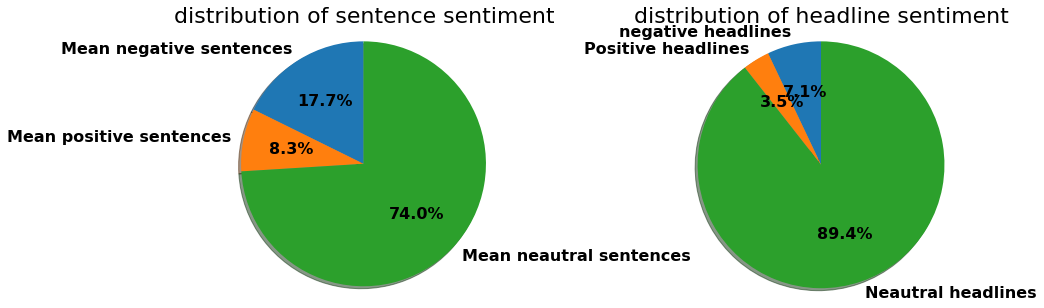

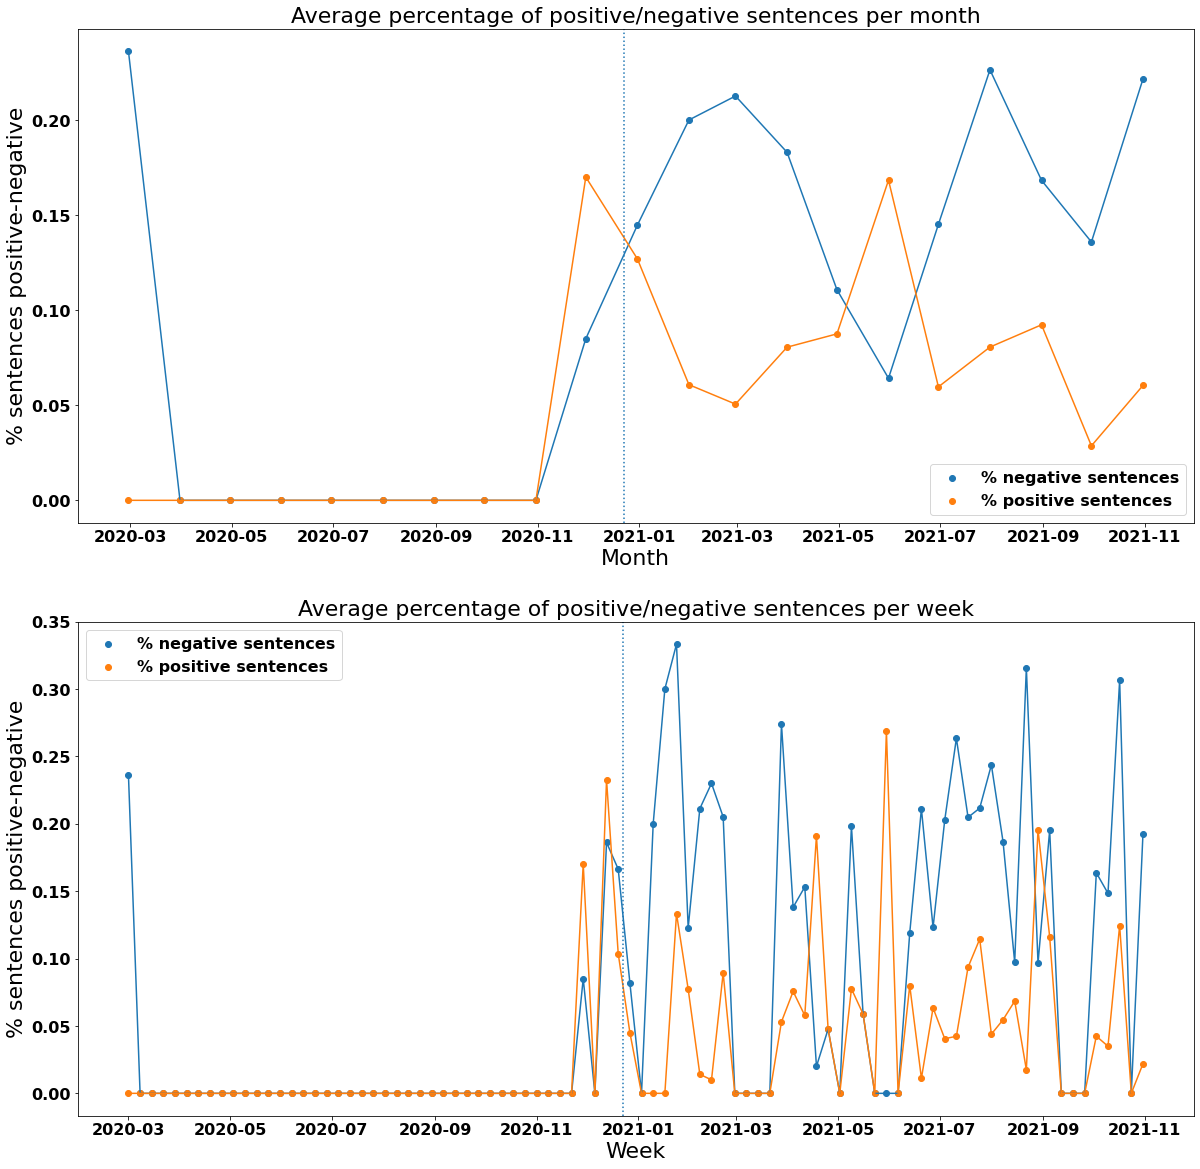

0.012116892373485389

In [35]:
olympics_words="Olympics|Olympic Games|Tokyo"
olympics=df_sub[(df_sub['Title_en'].str.contains(olympics_words))|(df_sub['Text_en'].str.contains(olympics_words))]
sentiment_analysis(olympics,'2020-12-23')
len(olympics)/len(df_sub)

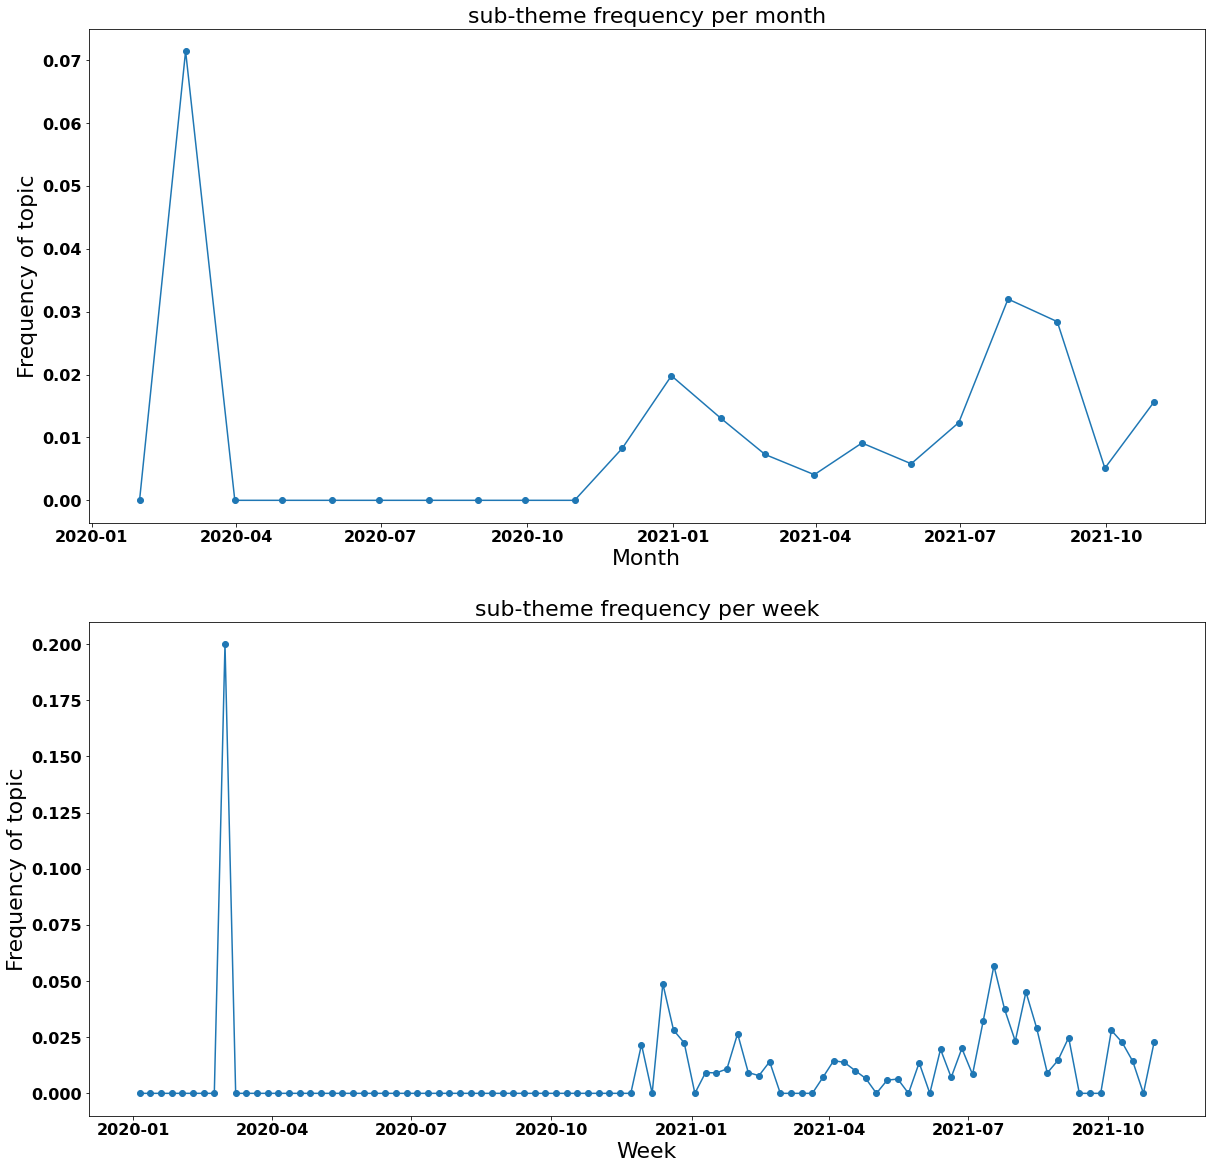

In [36]:
frequency_topics(df_sub,olympics)

SAMPLES OF POSITIVE SENTENCES
Tokyo is thus entering its third extraordinary economic support package in a few months, following the two launched in April and May.
And those who did not break the record have nevertheless recorded the biggest monthly jump in a long time: Paris for over 30 years, London is within a whisker of the record of January 1989, Tokyo since 1994, Athens since 1991, Frankfurt since 2003.
SAMPLES OF NEGATIVE SENTENCES
11.10am - Tokyo: more than 4,500 infections in one day Tokyo has recorded 4,515 new Covid-19 infections in 24 hours, a lower number than yesterday's record, when it rose above 5,000 for the first time during the pandemic.
Tension is so high that even Japan's Emperor Naruhito is worried that the Olympics could cause an increase in the number of infections.


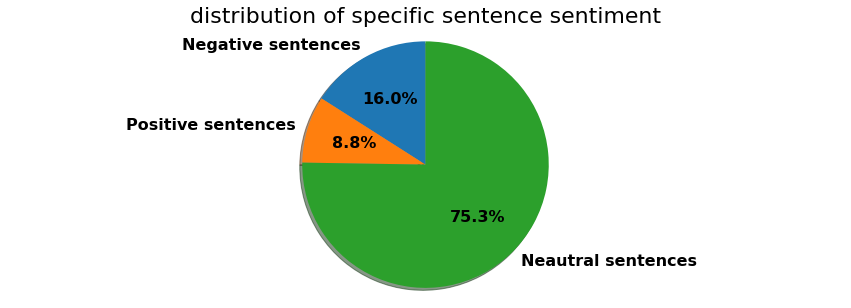

In [37]:
sentences_with_word(olympics,olympics_words)

In [38]:
# ### get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(olympics.list_labels[14318]) if x == 0]
# for i in indices: 
#     print(olympics.list_sentences[14318][i])

## COUNTRIES

In [39]:
usa_words="United States|US|Biden|Trump"
usa=df_sub[(df_sub['Title_en'].str.contains(usa_words))|(df_sub['Text_en'].str.contains(usa_words))]

In [40]:
len(usa)/len(df_sub)

0.15680684248039914

SAMPLES OF POSITIVE HEADLINES
Salone del Mobile 2021, today the inauguration of the Supersalone in Rho with Mattarella: "Extraordinary moment of relaunch for Italy".
OECD recipe for accelerating recovery: vaccinate everyone and faster
Budgetary discipline is the only vaccine to ward off the debt pandemic
SAMPLES OF NEGATIVE HEADLINES
Three out of four teenage students are ready to be vaccinated
Vaccines are needed for the whole of mankind, not just to generate profits.
Almost one in two Italians would not vaccinate against the coronavirus


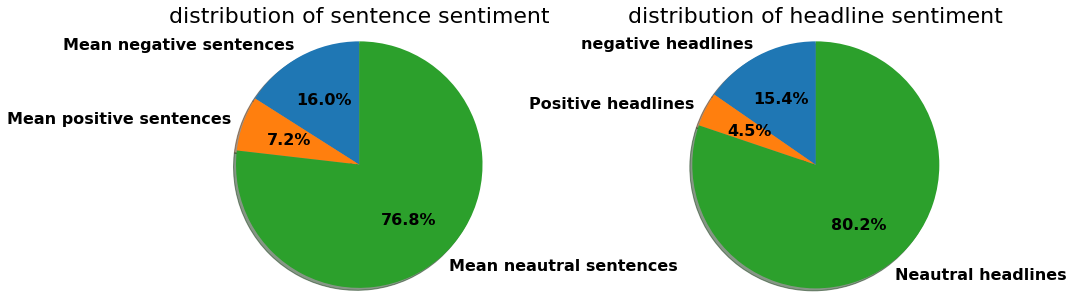

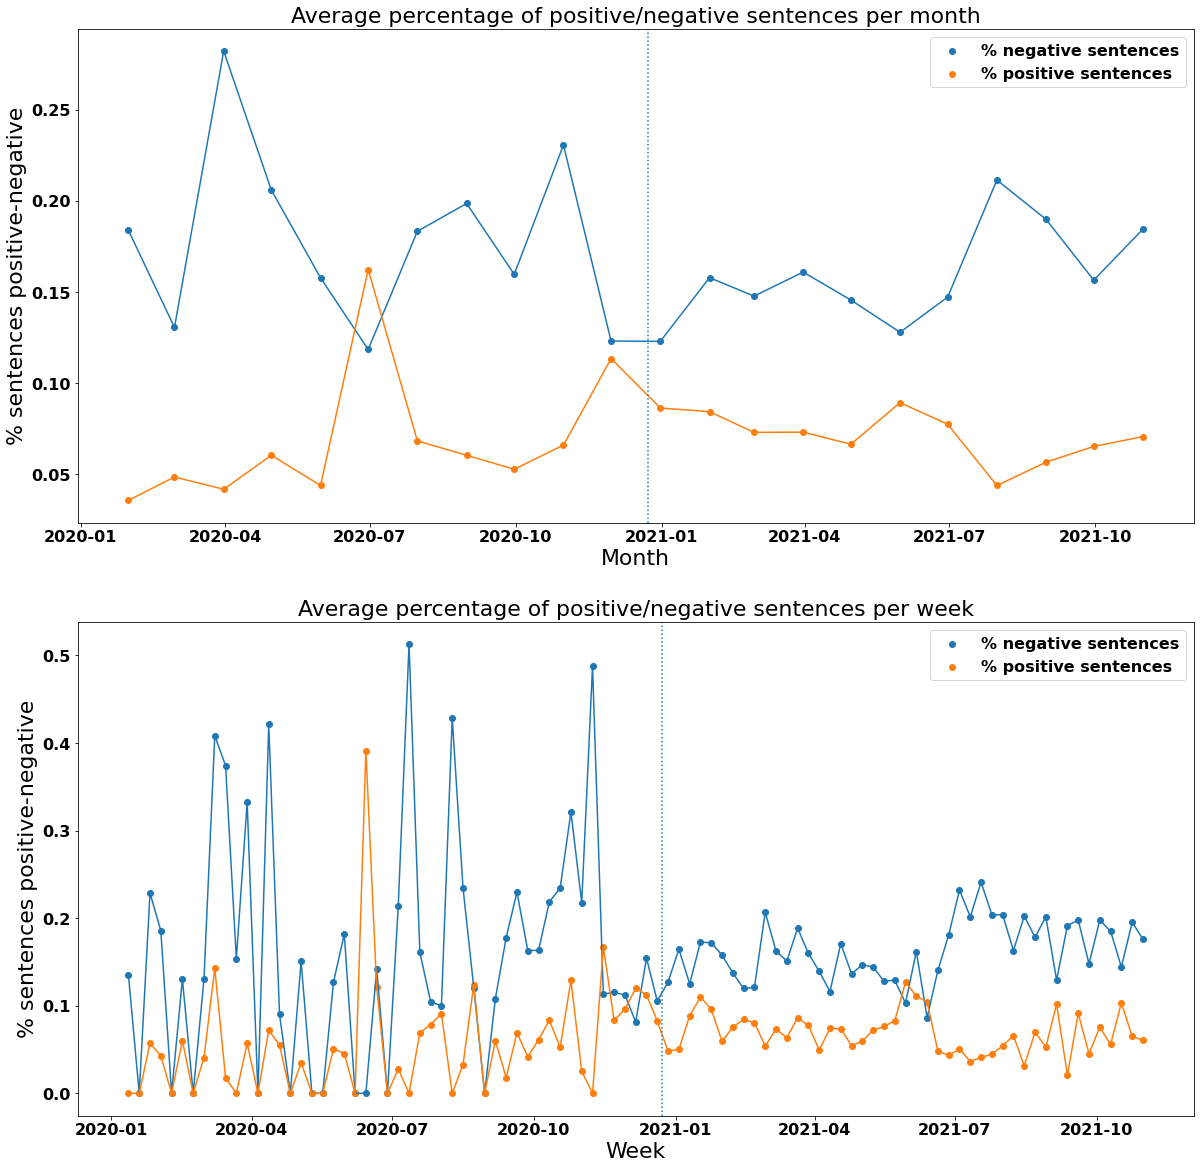

In [41]:
sentiment_analysis(usa,'2020-12-23')

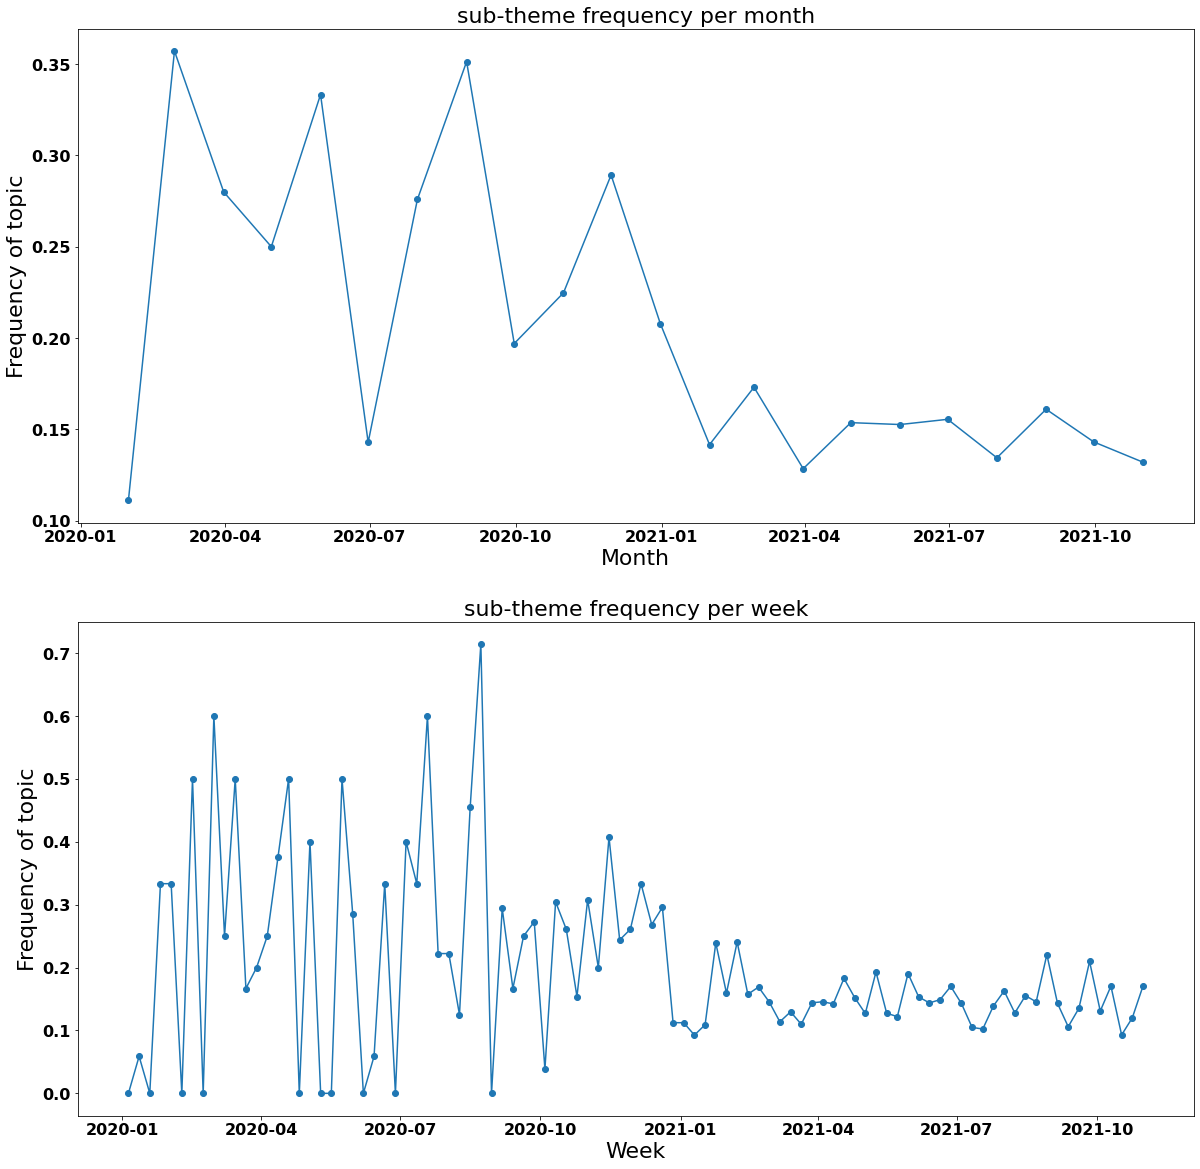

In [42]:
frequency_topics(df_sub,usa)

SAMPLES OF POSITIVE SENTENCES
Another piece of good news about the Moderna vaccine (66,000 doses of which are currently arriving in Italy) comes from the US Centers for Disease Control and Prevention (CDC), which is monitoring the post-vaccination effects in the US.
On the recovery front, commented the chairman of Confindustria, "we can only dream of the figures for the United States, but Italian manufacturing has shown itself to be a great asset of the country, even in this pandemic year.
SAMPLES OF NEGATIVE SENTENCES
The Biden administration is struggling to control what is, at this point, primarily a 'pandemic of the unvaccinated'.
"We believe there is a good chance that the dollar will weaken in the coming months, with both the current account deficit and the fiscal deficit in the US growing.


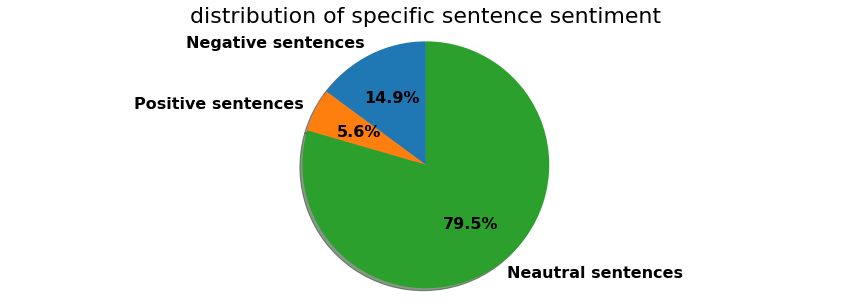

In [43]:
sentences_with_word(usa,usa_words)

In [44]:
russia_words="Russia|Moscow|Putin"
russia=df_sub[(df_sub['Title_en'].str.contains(russia_words))|(df_sub['Text_en'].str.contains(russia_words))]
len(russia)/len(df_sub)

0.04675694939415538

SAMPLES OF POSITIVE HEADLINES
Lancet: Sputnik V vaccine appears 91.6% safe and effective
Sputnik, Russian Covid vaccine 91.6 % effective: results in Lancet
Emirates sees recovery: by winter flights at 70% of pre-Covid capacity
SAMPLES OF NEGATIVE HEADLINES
Covid in Europe, growing infections: 'Catastrophe' Romania, fear in the East
Can Chinese vaccines be trusted? 45 governments have already ordered them
AstraZeneca suspended, what happens to people who have already had their first dose of vaccine?


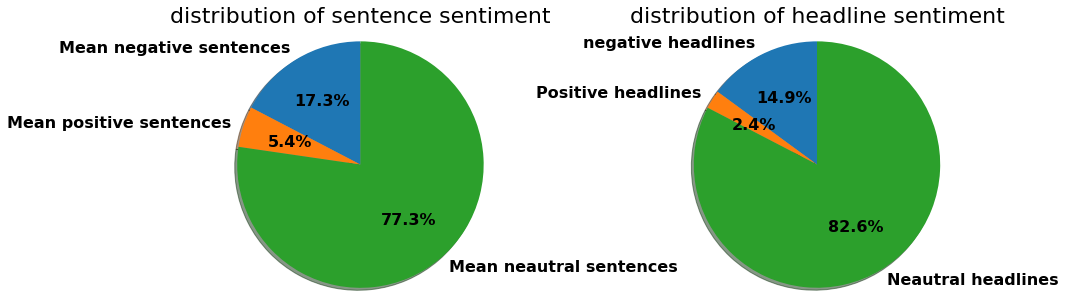

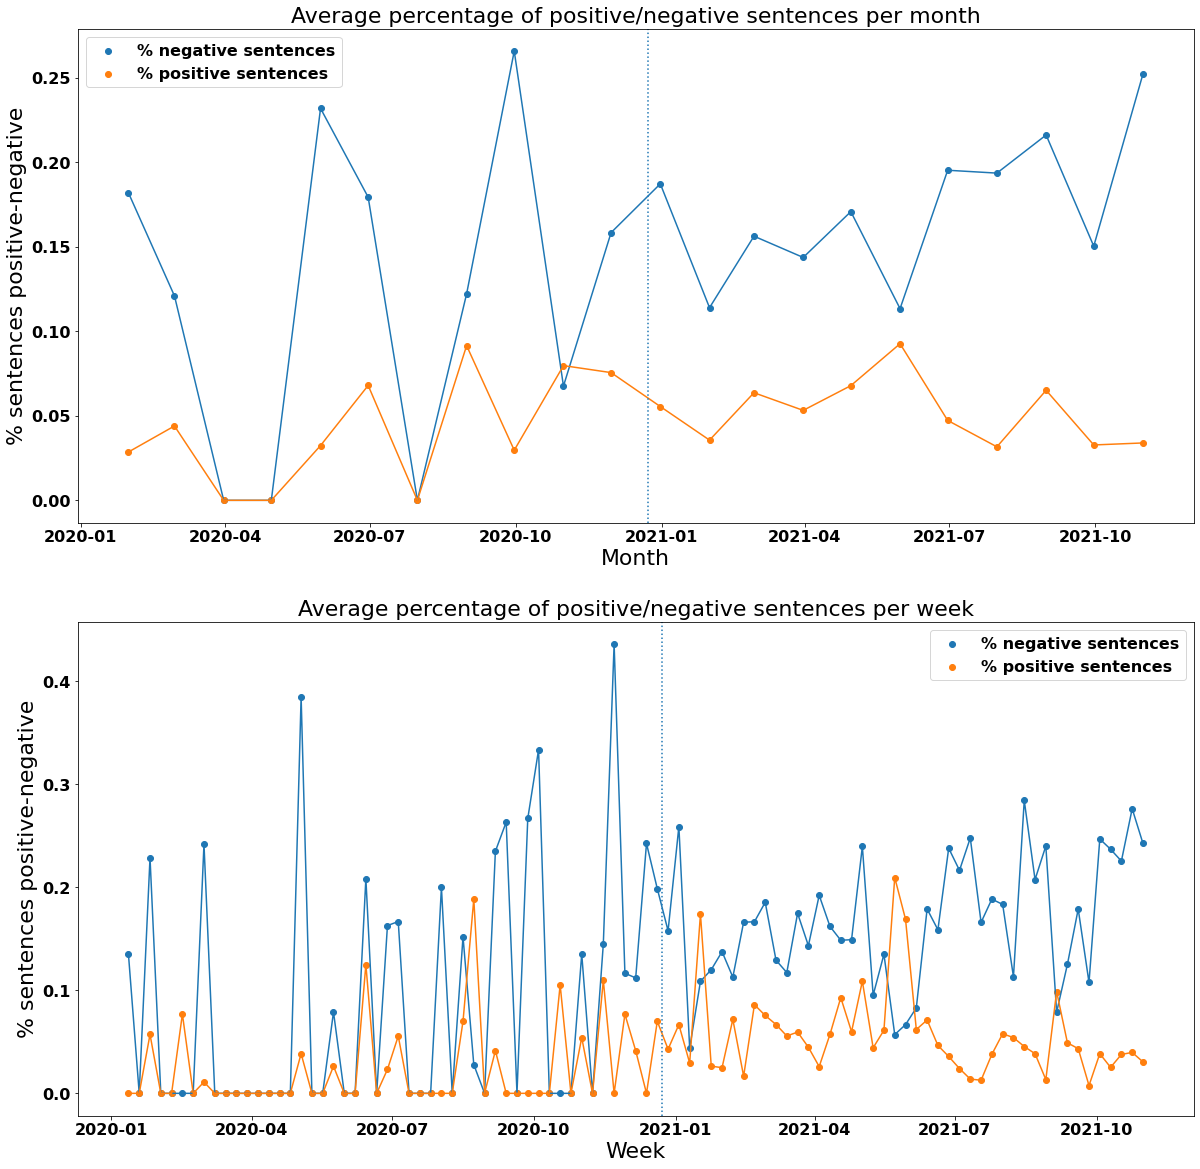

In [45]:
sentiment_analysis(russia,'2020-12-23')

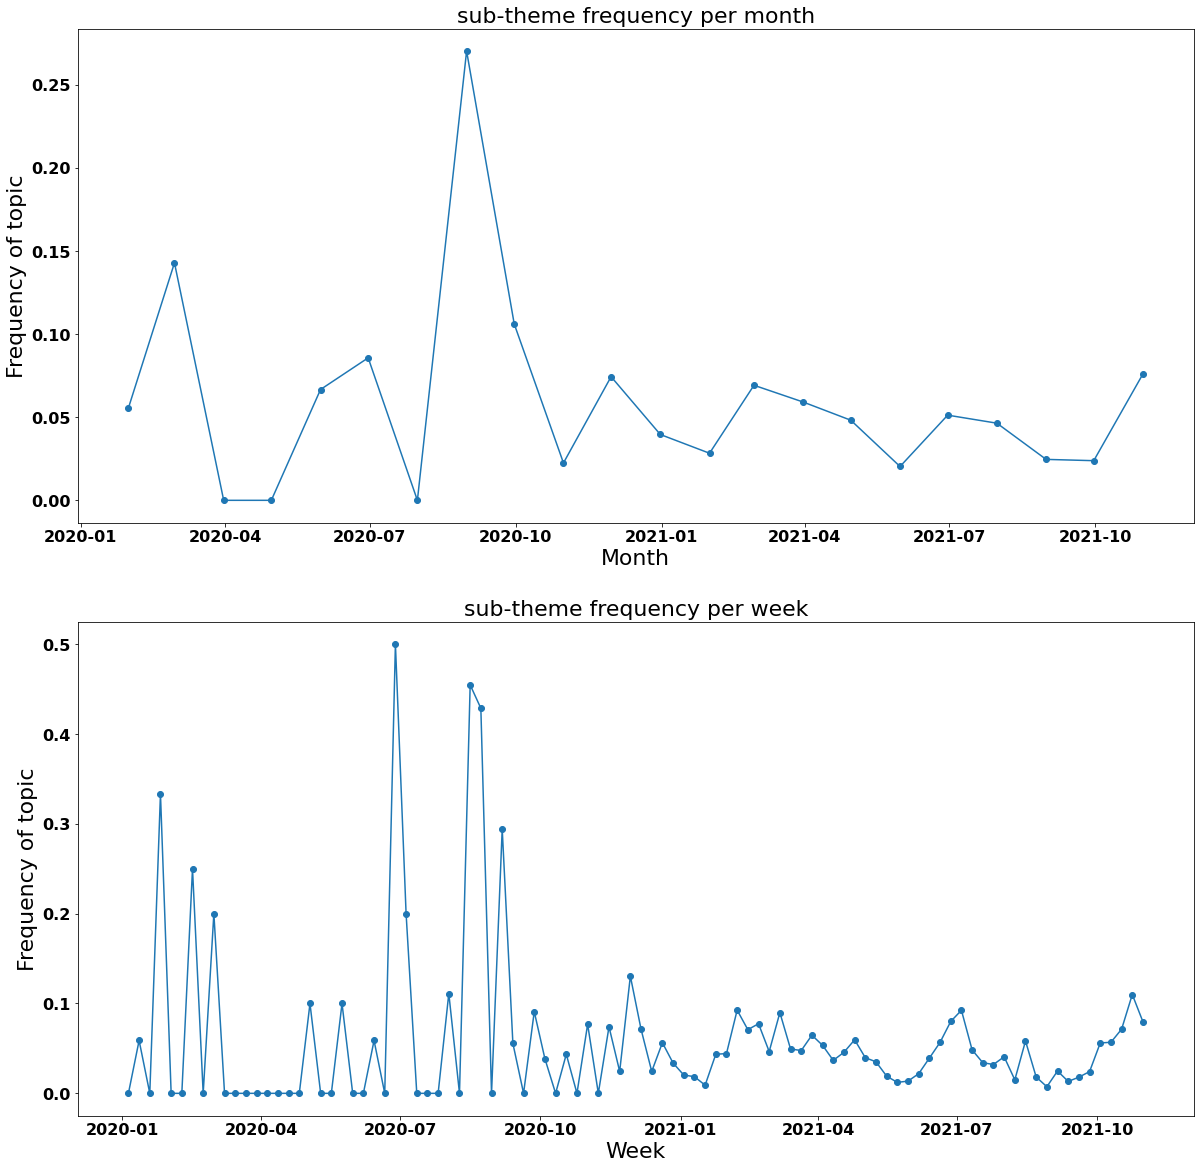

In [46]:
frequency_topics(df_sub,russia)

SAMPLES OF POSITIVE SENTENCES
In Moscow, where one of the vaccination centres is inside the Gum department store, they offered free ice cream as a prize.
Putin, Kremlin spokesman Dmitry Peskov reassured, is "absolutely healthy".
SAMPLES OF NEGATIVE SENTENCES
This brings to 4,057,698 the number of cases registered in Russia since the start of the pandemic, while 79,696 people have lost their lives.
10.38 a.m. - Russia, 100,000 dead Russia has recorded 9,021 new cases of the coronavirus and 384 deaths in the last 24 hours, surpassing the 100,000 mark since the start of the pandemic.


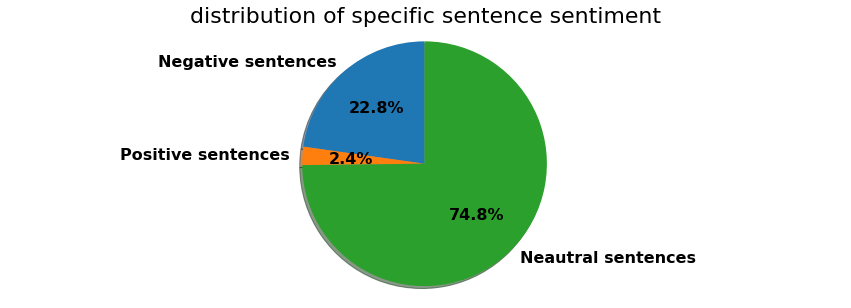

In [47]:
sentences_with_word(russia,russia_words)

In [48]:
india_words="India|Dheli"
india=df_sub[(df_sub['Title_en'].str.contains(india_words))|(df_sub['Text_en'].str.contains(india_words))]
len(india)/len(df_sub)

0.044191019244476125

SAMPLES OF POSITIVE HEADLINES
From mRNA vaccines to contact tracing: the 10 most important technologies of 2021, according to MIT
Sileo (ATS): "Brescia in the white zone since mid-June. Peaceful summer if we respect the distances".
The golden vaccine: developing a vaccine at the time of a pandemic
SAMPLES OF NEGATIVE HEADLINES
Covid, the Chilean anomaly: more people are vaccinated, but also more infected. Here's why (and what it must teach us)
Boris Johnson's letter: "We will give 1 billion doses to the poorest".
Palü: 'People with the Delta variant can infect 3-4 people, that's why young people should be vaccinated as well


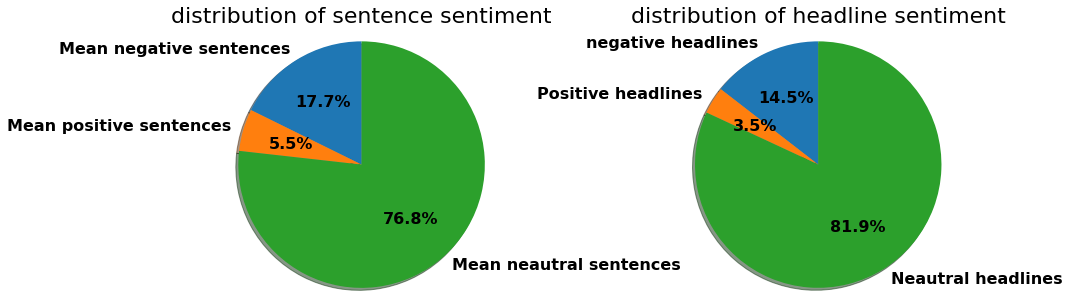

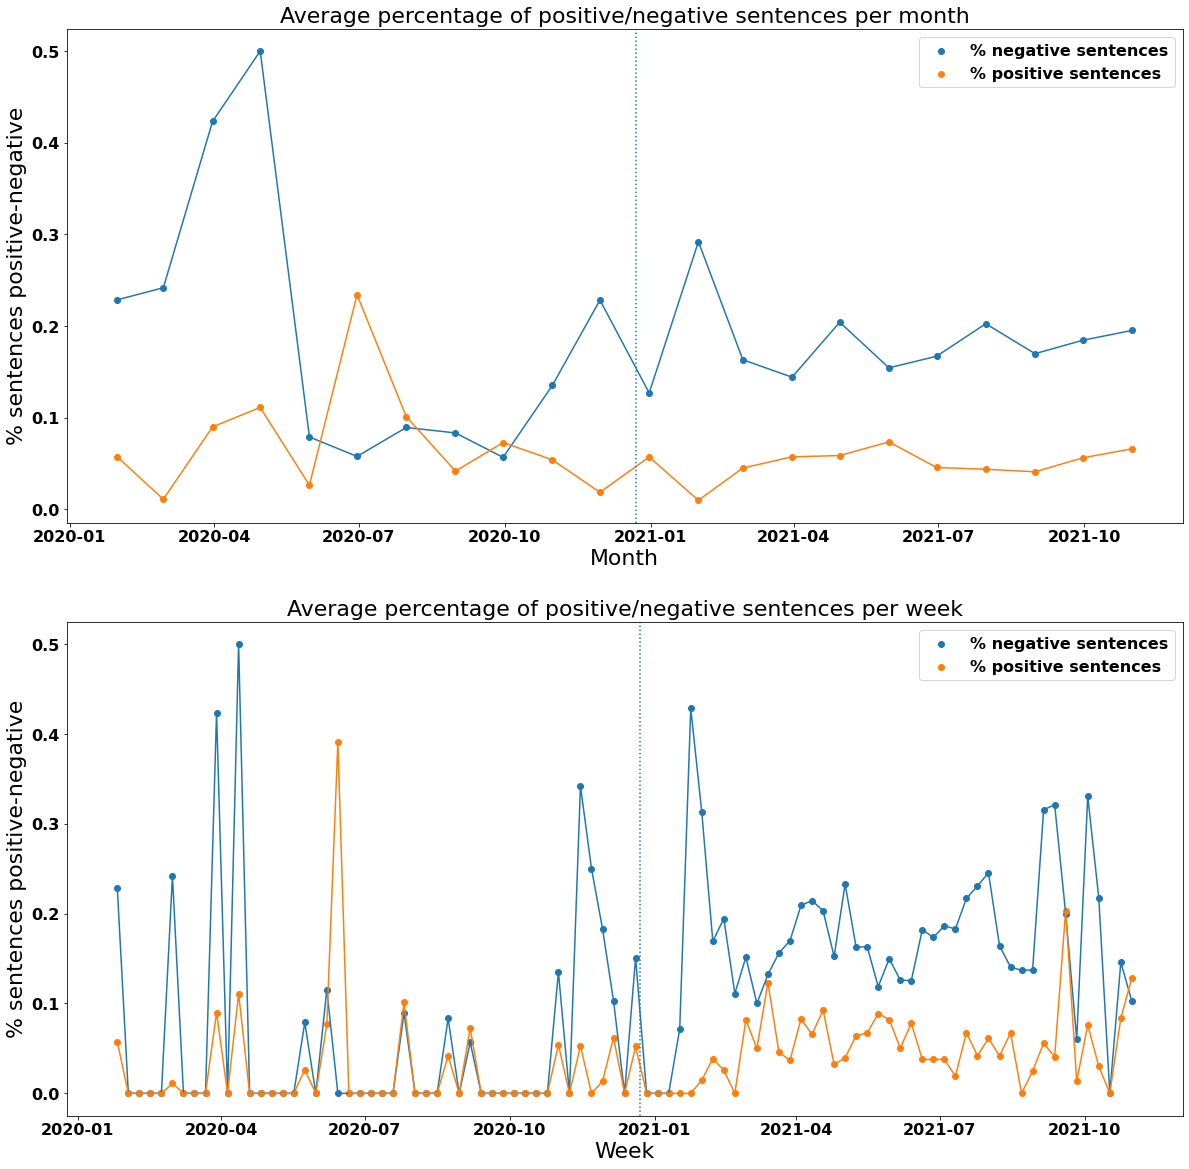

In [49]:
sentiment_analysis(india,'2020-12-23')

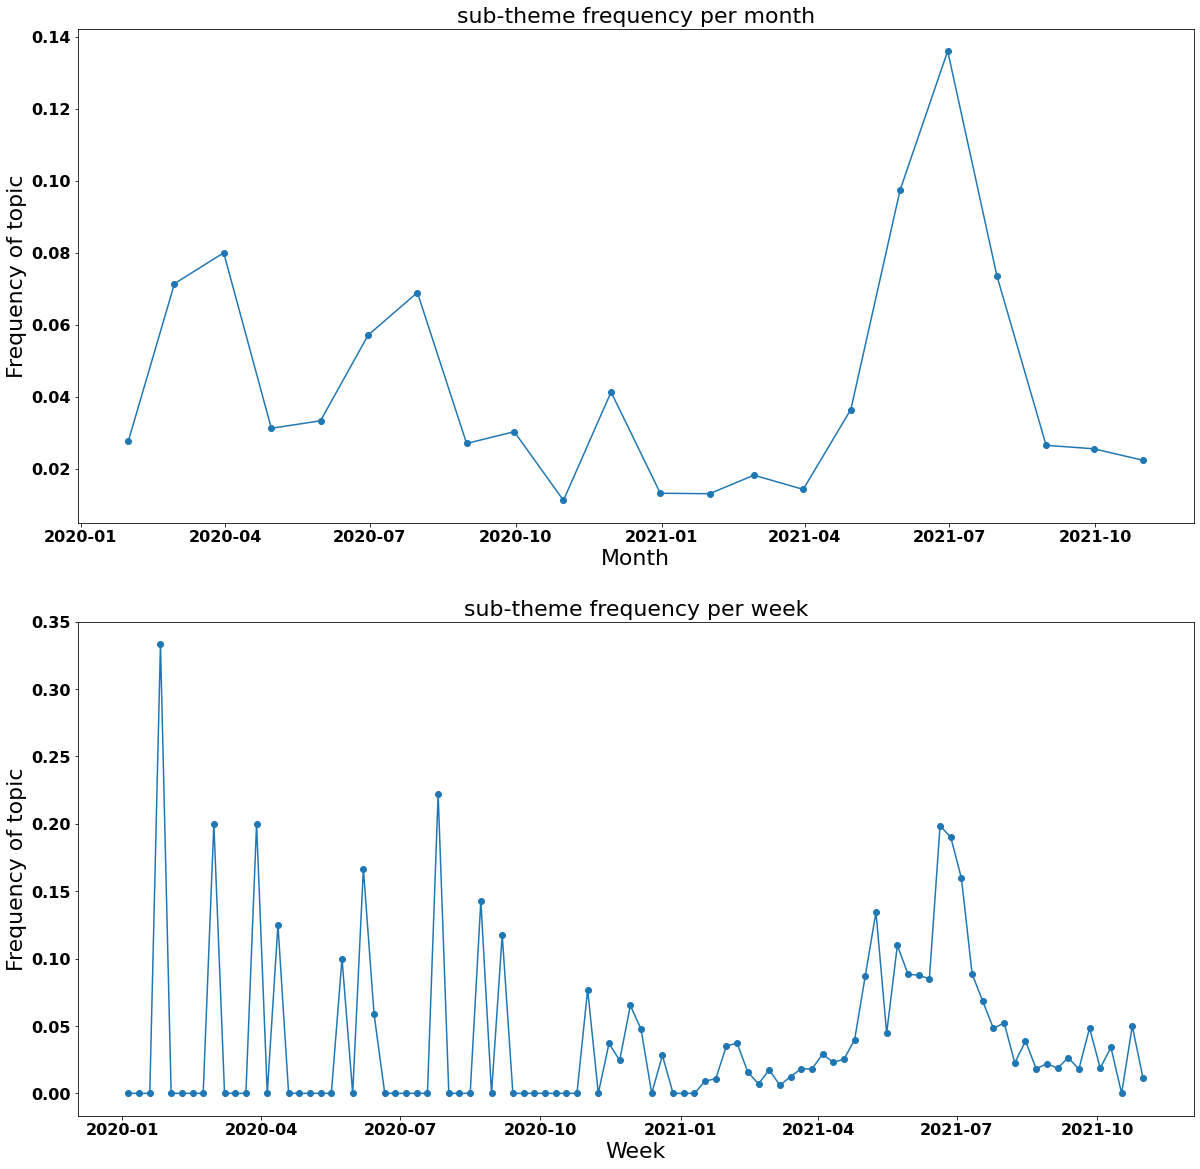

In [50]:
frequency_topics(df_sub,india)

SAMPLES OF POSITIVE SENTENCES
Thanks to e-health and telemedicine, for example, remote diagnosis of HIV patients in Zimbabwe increased by 700% during the pandemic and in India telemedicine consultations reached one million patients within a month of launch.
So far, it has delivered 28 million doses: ten million remain in India, which in turn is one of the beneficiary countries.
SAMPLES OF NEGATIVE SENTENCES
India is on the hunt for vaccines because it has overtaken Brazil to become the nation with the second highest number of infections in the world after the United States.
With a dose of sadness, India tells us that the virus may die out at some point.


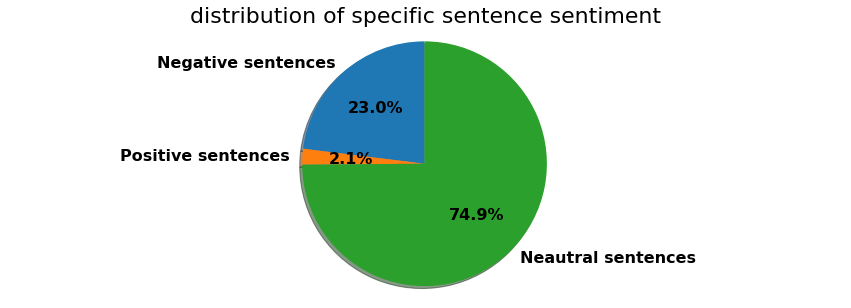

In [51]:
sentences_with_word(india, india_words)

In [12]:
italy_words="Draghi|Conte|Speranza"
italy=df_sub[(df_sub['Title_en'].str.contains(italy_words))|(df_sub['Text_en'].str.contains(italy_words))]
len(italy)/len(df_sub)

0.1781895937277263

SAMPLES OF POSITIVE HEADLINES
Smart working in the public and private sector: here's what can change
Ema gives green light to Pfizer-BioNTech vaccine for adolescents. Speranza: "Good news also for the re-opening of schools in September".
Sileri: 'We are bringing the Covid vaccine to your doorstep. The real breakthrough in 2-3 weeks'.
SAMPLES OF NEGATIVE HEADLINES
Coronavirus, vaccine scoundrels: the one thousand vaccine jumpers under investigation and all the others 'covered' by the Regions
Covid, De Luca: Campania risks orange zone
Veneto, 450 health workers already suspended. Letter to Minister Speranza: 'Wards at risk of closure'.


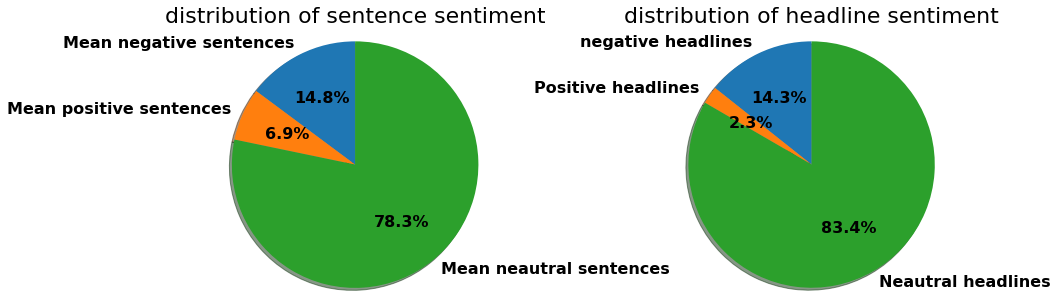

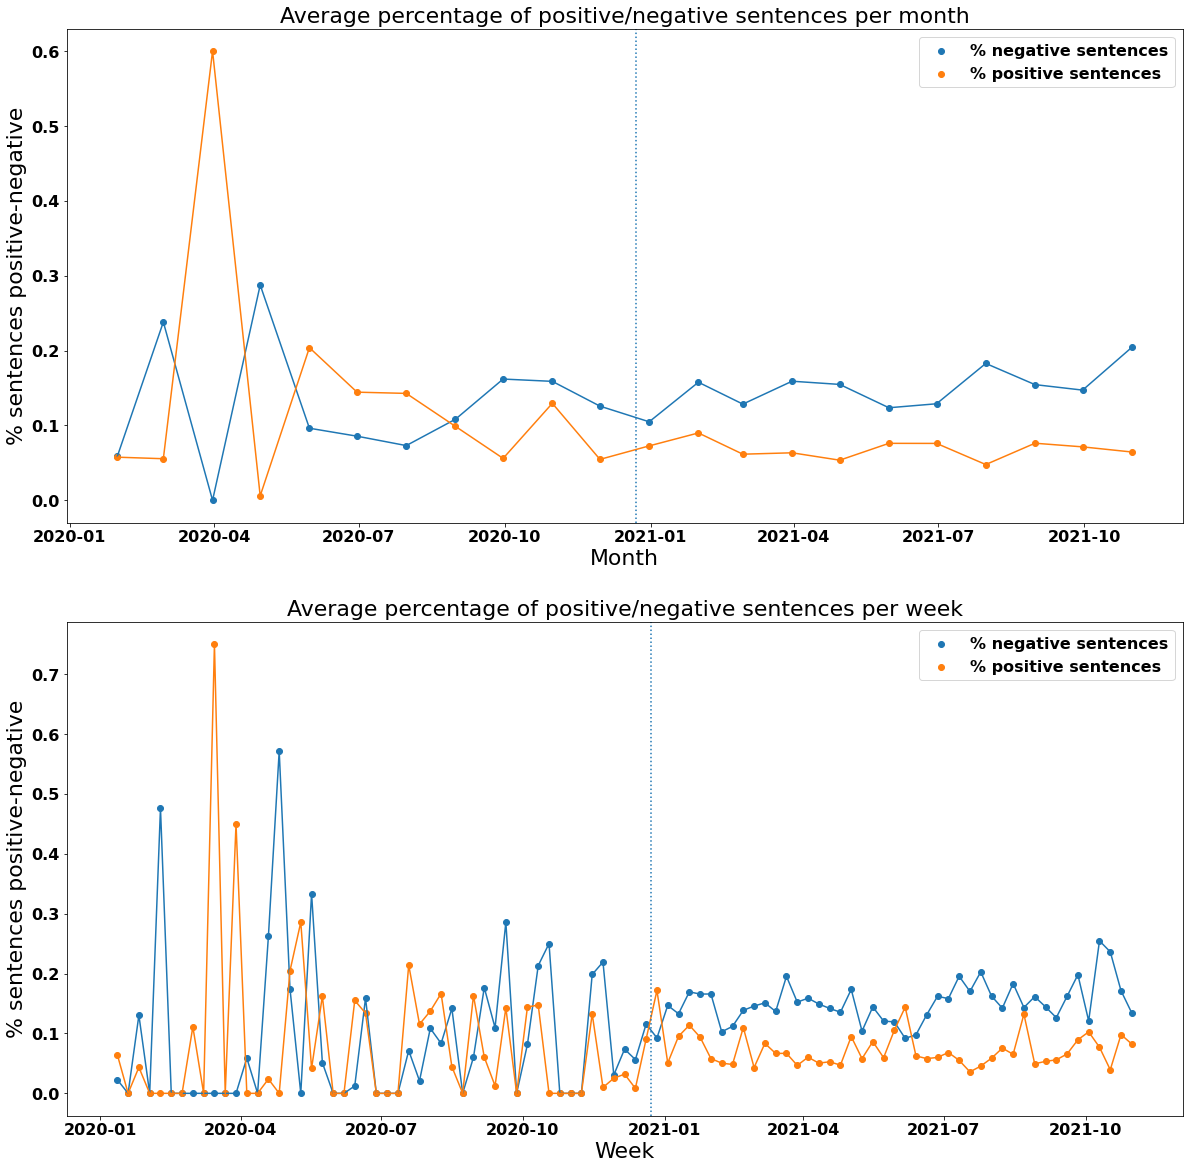

In [13]:
sentiment_analysis(italy,'2020-12-23')

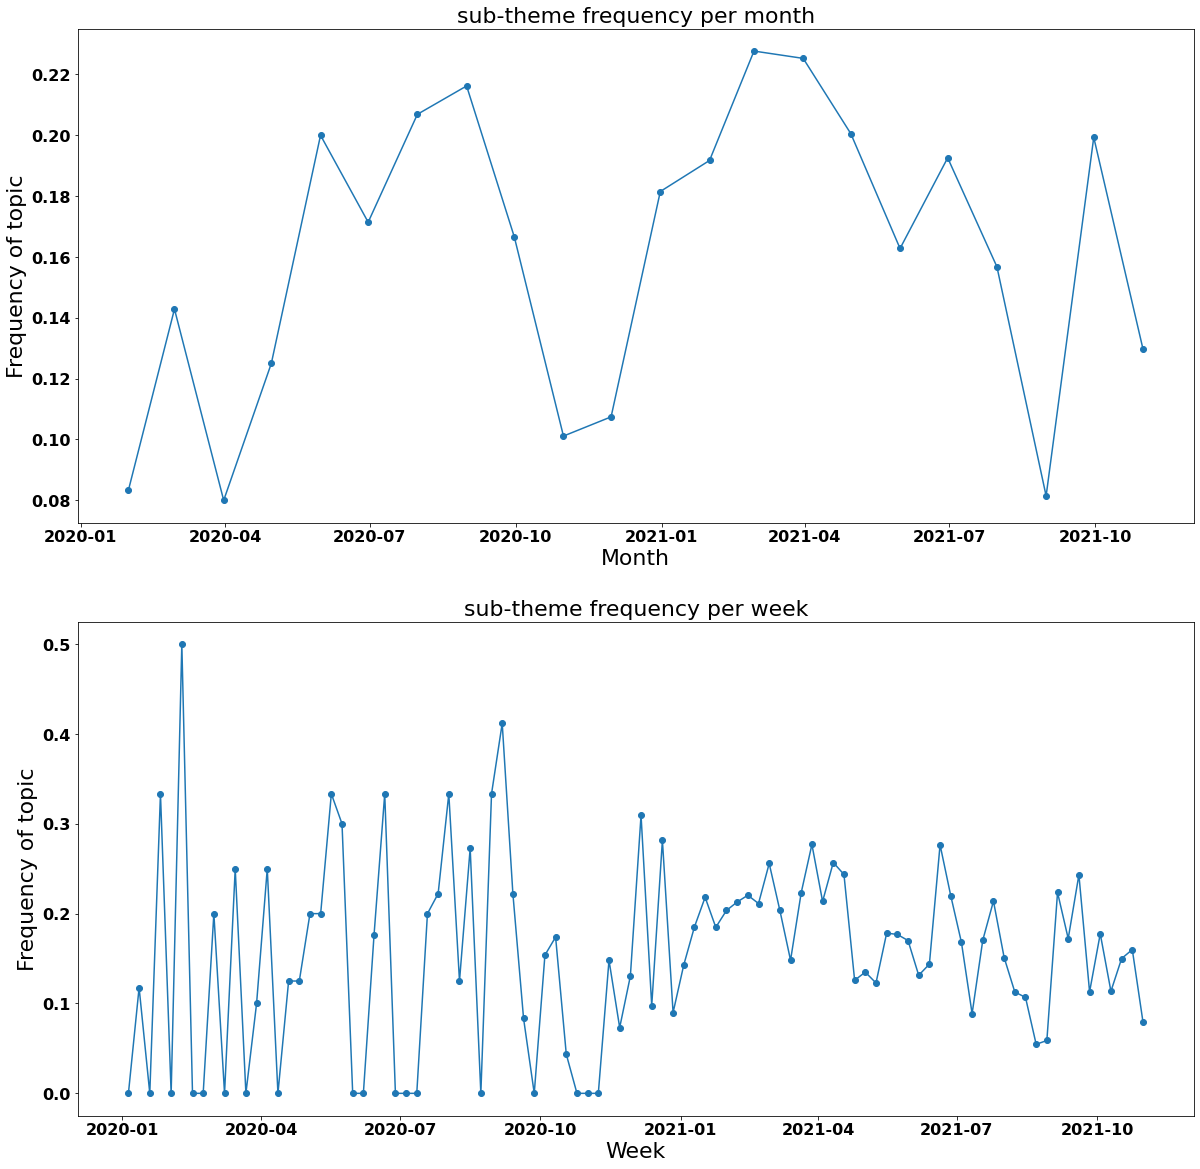

In [16]:
frequency_topics(df_sub,italy)

SAMPLES OF POSITIVE SENTENCES
Thank you President Draghi.
The Prime Minister Mario Draghi recalled in his speech today in the Senate, that the vaccination campaign in Italy is proceeding faster than the European average and thanked the Italians who, overcoming hesitation, have chosen to vaccinate in recent days.
SAMPLES OF NEGATIVE SENTENCES
If it is true that Mario Draghi got angry during the European Council meeting (of the heads of government of the 27 EU countries, held on 25-26 March), there were plenty of reasons to get angry.
The Health Minister, Roberto Speranza, made this clear yesterday after hectic days of talks with the CTC, given the new upsurge of the pandemic with the increase in infections due to the Delta variant that is becoming prevalent in the country.


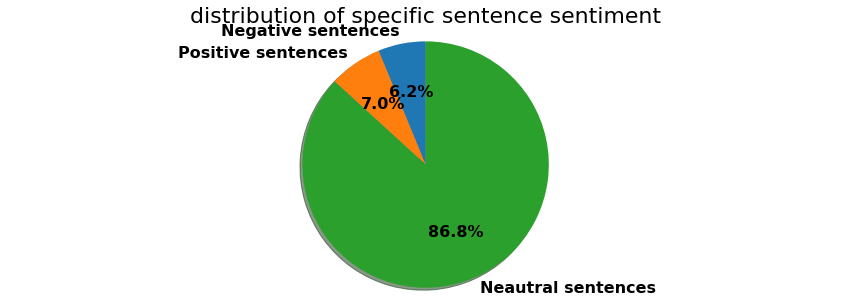

In [55]:
sentences_with_word(italy, italy_words)

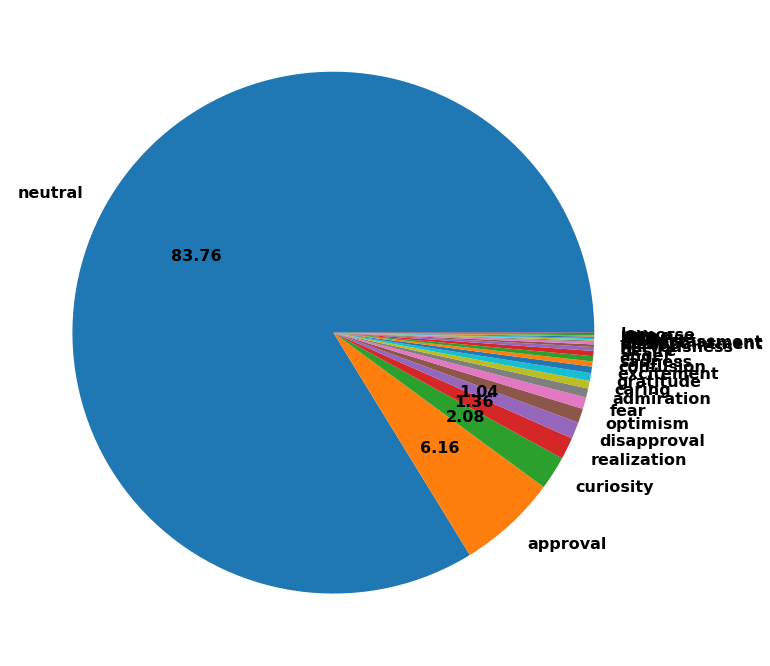

In [15]:
plot_emotions(italy)

## VACCINES

SAMPLES OF POSITIVE HEADLINES
Covid/ AstraZeneca-Irbm vaccine 70% effective. Stores in the fridge
Covid, Cuneo mayor positive after first dose of AstraZeneca vaccine
AstraZeneca effective, here's why in nine points: Cts analysis
SAMPLES OF NEGATIVE HEADLINES
AstraZeneca, a woman from Naples admitted in very serious condition
AstraZeneca, healthcare workers also miss vaccines: 59% of summonses absent
Liguria, more than 90% of over 60s refuse AstraZeneca vaccine


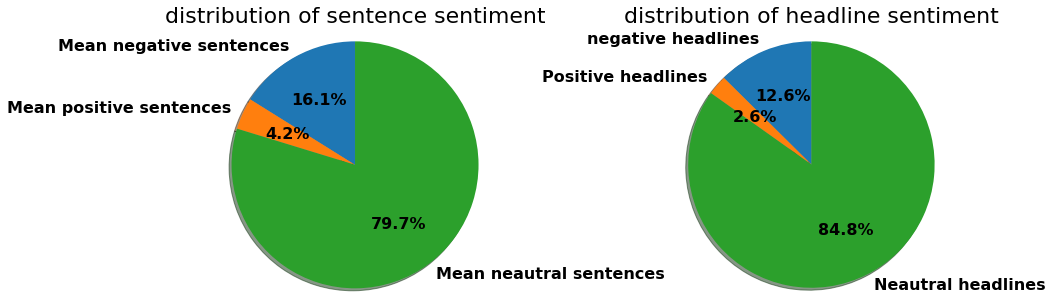

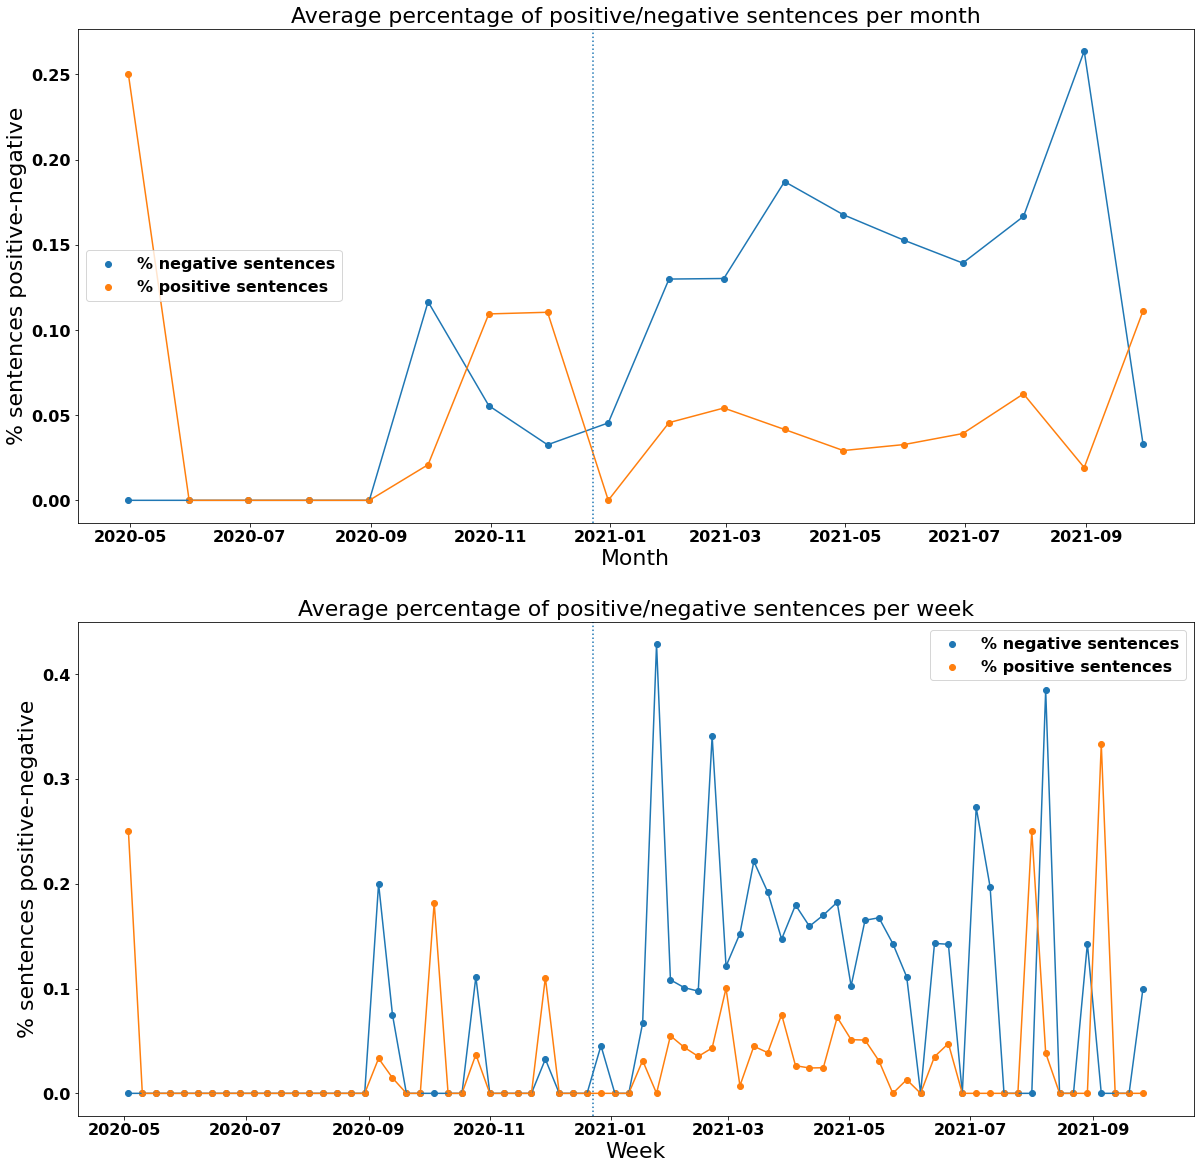

0.044191019244476125

In [56]:
astrazeneca_h=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))&(~df_sub['Title_en'].str.contains("Pfizer|Moderna"))]
sentiment_analysis(astrazeneca_h,'2020-12-23')
len(astrazeneca_h)/len(df_sub)

In [57]:
astrazeneca_h_t=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))|(df_sub['Text_en'].str.contains("Astrazeneca|AstraZeneca"))]

SAMPLES OF POSITIVE SENTENCES
AstraZeneca is committed to providing the EMEA with access to data on the candidate vaccine as soon as they become available to ensure that the Agency's review process can be as timely as possible.
The 140,000 from AstraZeneca are set aside for second doses because we are talking about a vaccine that works and gives an excellent antibody response.
SAMPLES OF NEGATIVE SENTENCES
Stop the use of AstraZeneca for those under 60.
Of the 17 million vaccinations carried out across Europe, AstraZeneca reports that 22 thromboses and 15 pulmonary embolisms had occurred by 8 March: as The Times points out, that's about the number of people who are struck by lightning in a year in Britain.


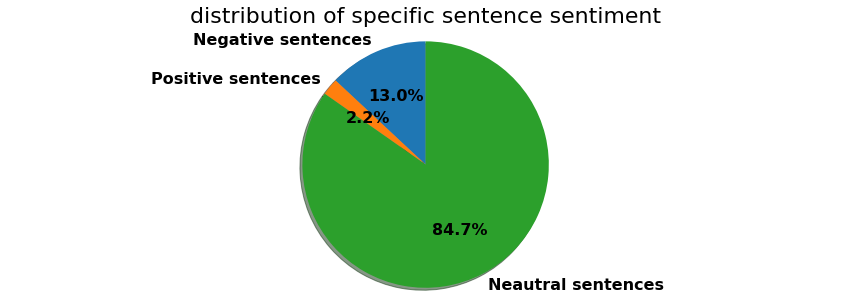

In [58]:
sentences_with_word(astrazeneca_h,'AstraZeneca')

SAMPLES OF POSITIVE HEADLINES
Covid/ Mattarella: "Valuable role of the Armed Forces". And Arcuri confirms: first Pfizer vaccines on 26 December in Rome and Vaccine Day on 27 December.
Third dose of Covid vaccine works: Pfizer's efficacy up to 95% in Israel
Covid/Aifa: green light for Pfizer-Biontech vaccine, free for all
SAMPLES OF NEGATIVE HEADLINES
Vibonati policeman dies. A few hours earlier he had received Pfizer vaccine
Virginia and the odyssey of the 6 Pfizer doses injected by mistake: 'But to the kids I say "run and get vaccinated"'.
Lodi, 74-year-old dies two hours after second dose of Pfizer


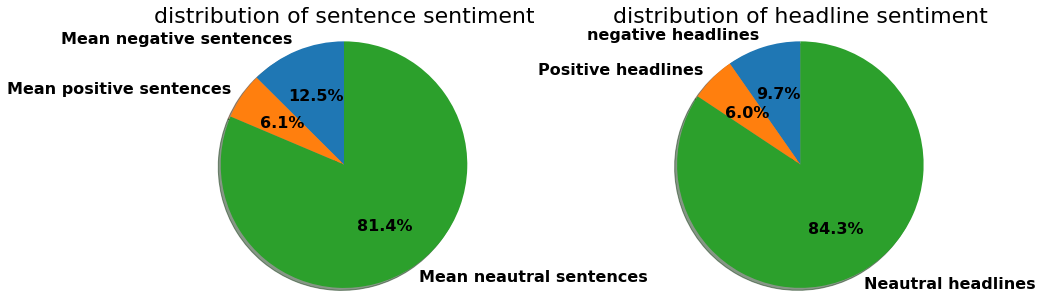

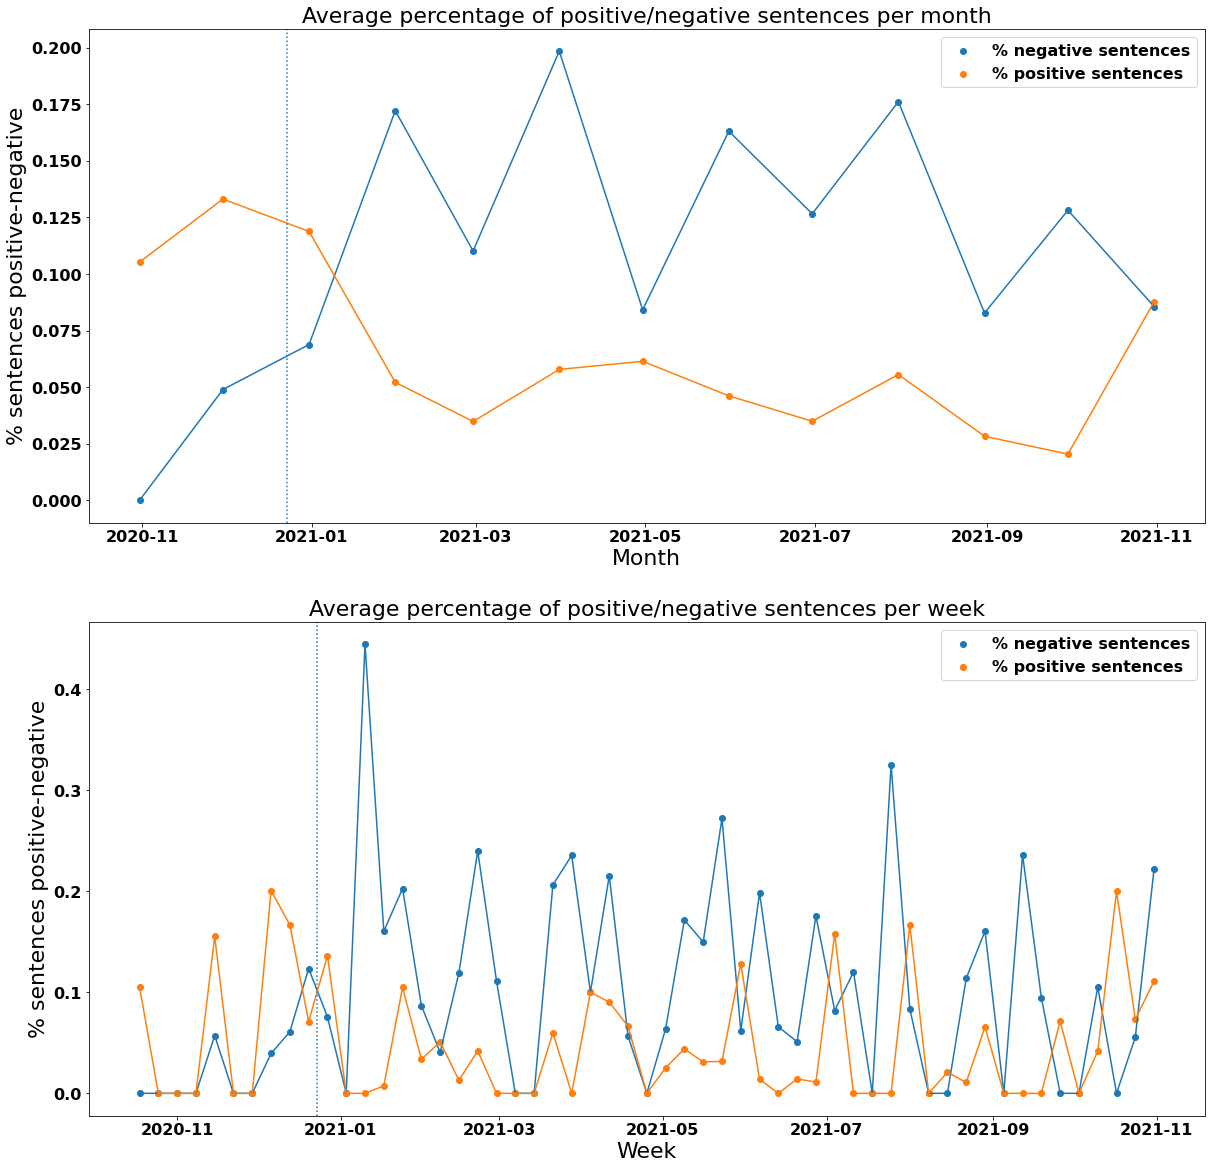

0.01910192444761226

In [59]:
pfizer_h=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Moderna"))]
sentiment_analysis(pfizer_h,'2020-12-23')
len(pfizer_h)/len(df_sub)

In [60]:
pfizer_h_t=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))|(df_sub['Text_en'].str.contains("Pfizer|pfizer"))]

SAMPLES OF POSITIVE SENTENCES
Modern uses the same innovative technology as Pfizer, called messenger RNA (mRNA), where genetic instructions are sent to cells to generate immune responses.
BioNTech/Pfizer's vaccine has crossed the finish line first: it has been definitively approved by the US Food and Drug Administration for everyone aged 16 and over.
SAMPLES OF NEGATIVE SENTENCES
Severe headaches and fatigue were reported after the Pfizer injection in a lower proportion of participants aged 12-15 years compared to participants aged 16-25 years'.
An extremely rare risk of both the Pfizer and Moderna vaccines is inflammation of the heart, usually in young men or boys.


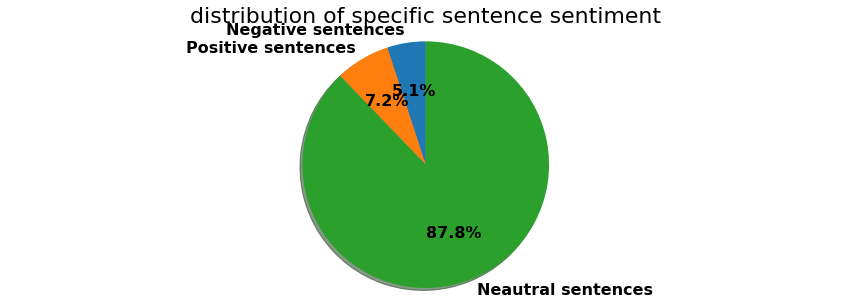

In [61]:
sentences_with_word(pfizer_h,'Pfizer')

SAMPLES OF POSITIVE HEADLINES
Covid/Moderna: 94.1 % effective vaccine, today application for authorisation in Europe and USA
Moderna's announcement: Covid vaccine 95% effective, keeps in fridge for 30 days
SAMPLES OF NEGATIVE HEADLINES
No samples of negative headlines


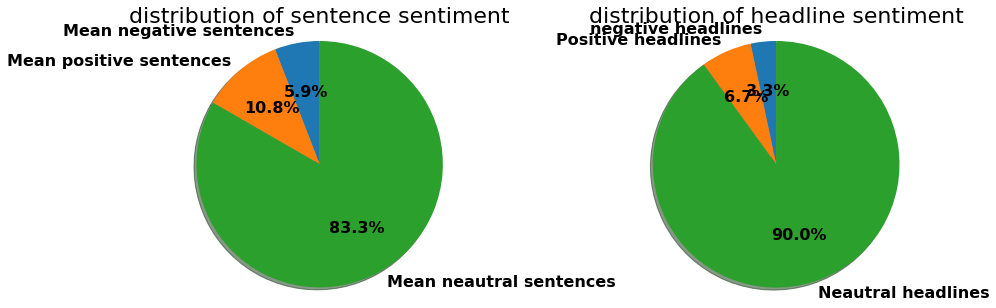

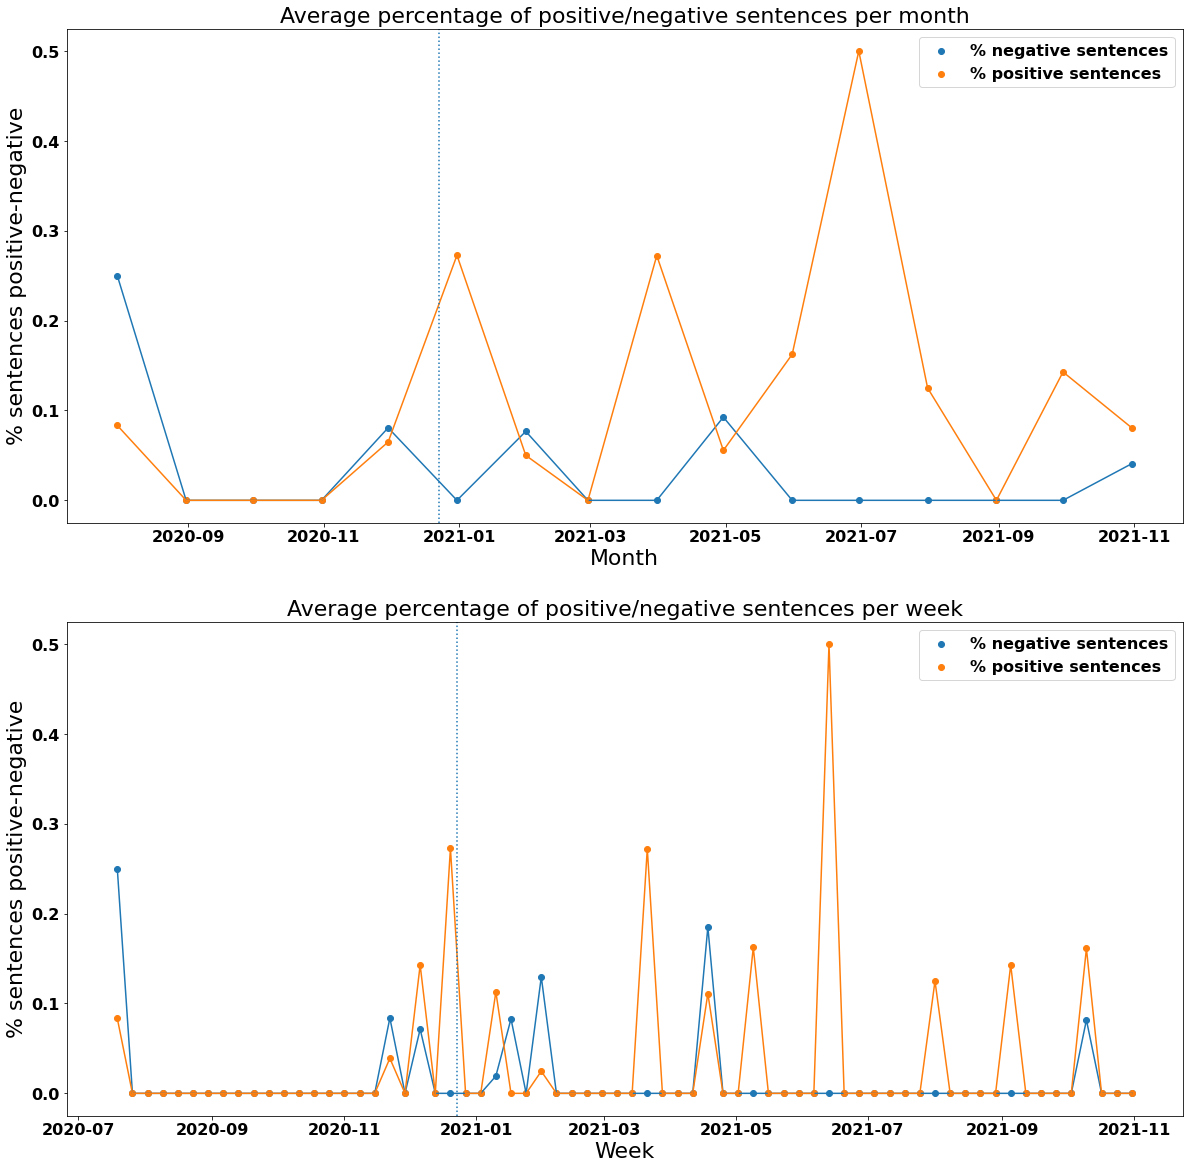

0.0042765502494654314

In [62]:
moderna_h=df_sub[(df_sub['Title_en'].str.contains("Moderna|moderna"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Pfizer"))]
sentiment_analysis(moderna_h,'2020-12-23')
len(moderna_h)/len(df_sub)

In [63]:
moderna_h_t=df_sub[(df_sub['Title_en'].str.contains("Moderna"))|(df_sub['Text_en'].str.contains("Moderna"))]

SAMPLES OF POSITIVE SENTENCES
"We appreciate the confidence placed in Moderna andmRNA-1273, our Covid-19 vaccine candidate, demonstrated by this increase in the supply agreement with the European Commission," said Stéphane Bancel, Moderna's chief executive officer.
The new data 'puts us on a positive path towards the larger phase 3 trials, which we hope will demonstrate the safety and efficacy' of the vaccine, Tal Zaks, Moderna's chief medical officer, told CNBC.
SAMPLES OF NEGATIVE SENTENCES
The announcement puts Moderna at the head of the global race for a vaccine against Covid-19, which has so far infected more than 13.2 million people worldwide and caused more than 570,000 deaths.
Eight hundred doses of Moderna vaccine, one of the last to arrive in Italy in recent days, have been declared unusable after being left in a broken-down cold room in the night between Thursday and Friday, making it unsuitable for storing the serum and its components at the Morgagni Pierantoni Hospital in 

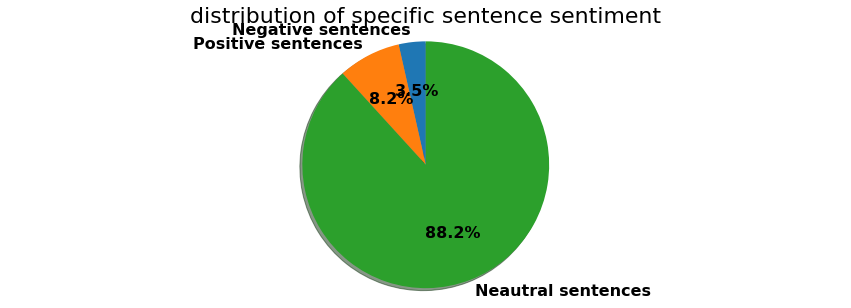

In [64]:
sentences_with_word(moderna_h,'Moderna')

In [3]:
fr_words="France"
fr=df[(df['Title_en'].str.contains(fr_words))|(df['Text_en'].str.contains(fr_words))]
print(len(fr)/len(df))

spain_words="Spain"
spain=df[(df['Title_en'].str.contains(spain_words))|(df['Text_en'].str.contains(spain_words))]
print(len(spain)/len(df))

uk_words="United Kingdom|UK"
uk=df[(df['Title_en'].str.contains(uk_words))|(df['Text_en'].str.contains(uk_words))]
print(len(uk)/len(df))


sw_words="Switzerland"
sw=df[(df['Title_en'].str.contains(sw_words))|(df['Text_en'].str.contains(sw_words))]
print(len(sw)/len(df))

it_words="Italy"
it=df[(df['Title_en'].str.contains(it_words))|(df['Text_en'].str.contains(it_words))]
print(len(it)/len(df))

0.1804857621440536
0.045644891122278056
0.09701284198771636
0.016471245114461196
0.4156895589056393
